In [1]:
import os
print("Conda environment:", os.environ.get('CONDA_DEFAULT_ENV'))

Conda environment: tf


In [2]:
import tensorflow as tf

# Print TensorFlow version
print("TensorFlow version:", tf.__version__)

# Check for GPU availability
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"GPU is available: {gpus}")
    for i, gpu in enumerate(gpus):
        print(f" - GPU {i}: {gpu.name}")
else:
    print("No GPU found. TensorFlow is using CPU.")

TensorFlow version: 2.10.1
GPU is available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
 - GPU 0: /physical_device:GPU:0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from skopt.space import Real, Integer, Categorical
import shap
import lime
import os
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager

import time
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor

shap.initjs()
# Set global font to Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

In [4]:
db = pd.read_excel('Data_Format_NL_Vib_DH_CH.xlsx')
db

Layers Boundary_Conditions  Modulus_Ratios  Side_to_Thickness_Ratios  \
0        16                CCCC              10                        10   
1        16                CCCC              10                        10   
2        16                CCCC              10                        10   
3        16                CCCC              10                        10   
4        16                CCCC              10                        10   
..      ...                 ...             ...                       ...   
139      48                SSSS              40                       100   
140      48                SSSS              40                       100   
141      48                SSSS              40                       100   
142      48                SSSS              40                       100   
143      48                SSSS              40                       100   

    Configurations    rrp2    rrp4    rrp6    rrp8     rr1  
0              DH6  1.0174  1.0684  1.1496  1.2564  1.2494  
1              CH6  1.0172  1.0674  1.1468  1.2508  1.2911  
2             DH12  1.0191  1.0747  1.1622  1.2760  1.2682  
3             CH12  1.0179  1.0702  1.1533  1.2626  1.2521  
4               CP  1.0176  1.0689  1.1501  1.2563  1.2949  
..             ...     ...     ...     ...     ...     ...  
139            CH6  1.0308  1.1183  1.2512  1.4176  1.6077  
140           DH12  1.0292  1.1126  1.2399  1.4002  1.5843  
141           CH12  1.0290  1.1119  1.2386  1.3981  1.5810  
142             CP  1.0422  1.1601  1.3351  1.5492  1.7898  
143             QI  1.0284  1.1097  1.2340  1.3908  1.5709  

[144 rows x 10 columns]

In [5]:
db=db.dropna()
db

Layers Boundary_Conditions  Modulus_Ratios  Side_to_Thickness_Ratios  \
0        16                CCCC              10                        10   
1        16                CCCC              10                        10   
2        16                CCCC              10                        10   
3        16                CCCC              10                        10   
4        16                CCCC              10                        10   
..      ...                 ...             ...                       ...   
139      48                SSSS              40                       100   
140      48                SSSS              40                       100   
141      48                SSSS              40                       100   
142      48                SSSS              40                       100   
143      48                SSSS              40                       100   

    Configurations    rrp2    rrp4    rrp6    rrp8     rr1  
0              DH6  1.0174  1.0684  1.1496  1.2564  1.2494  
1              CH6  1.0172  1.0674  1.1468  1.2508  1.2911  
2             DH12  1.0191  1.0747  1.1622  1.2760  1.2682  
3             CH12  1.0179  1.0702  1.1533  1.2626  1.2521  
4               CP  1.0176  1.0689  1.1501  1.2563  1.2949  
..             ...     ...     ...     ...     ...     ...  
139            CH6  1.0308  1.1183  1.2512  1.4176  1.6077  
140           DH12  1.0292  1.1126  1.2399  1.4002  1.5843  
141           CH12  1.0290  1.1119  1.2386  1.3981  1.5810  
142             CP  1.0422  1.1601  1.3351  1.5492  1.7898  
143             QI  1.0284  1.1097  1.2340  1.3908  1.5709  

[144 rows x 10 columns]

In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Layers                    144 non-null    int64  
 1   Boundary_Conditions       144 non-null    object 
 2   Modulus_Ratios            144 non-null    int64  
 3   Side_to_Thickness_Ratios  144 non-null    int64  
 4   Configurations            144 non-null    object 
 5   rrp2                      144 non-null    float64
 6   rrp4                      144 non-null    float64
 7   rrp6                      144 non-null    float64
 8   rrp8                      144 non-null    float64
 9   rr1                       144 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 11.4+ KB


In [7]:
rrp2= db.iloc[:,:-5]
rrp2

Layers Boundary_Conditions  Modulus_Ratios  Side_to_Thickness_Ratios  \
0        16                CCCC              10                        10   
1        16                CCCC              10                        10   
2        16                CCCC              10                        10   
3        16                CCCC              10                        10   
4        16                CCCC              10                        10   
..      ...                 ...             ...                       ...   
139      48                SSSS              40                       100   
140      48                SSSS              40                       100   
141      48                SSSS              40                       100   
142      48                SSSS              40                       100   
143      48                SSSS              40                       100   

    Configurations  
0              DH6  
1              CH6  
2             DH12  
3             CH12  
4               CP  
..             ...  
139            CH6  
140           DH12  
141           CH12  
142             CP  
143             QI  

[144 rows x 5 columns]

In [8]:
rrp2["Nonlinear_Frequency_Ratio"]=db["rrp2"]
rrp2

Layers Boundary_Conditions  Modulus_Ratios  Side_to_Thickness_Ratios  \
0        16                CCCC              10                        10   
1        16                CCCC              10                        10   
2        16                CCCC              10                        10   
3        16                CCCC              10                        10   
4        16                CCCC              10                        10   
..      ...                 ...             ...                       ...   
139      48                SSSS              40                       100   
140      48                SSSS              40                       100   
141      48                SSSS              40                       100   
142      48                SSSS              40                       100   
143      48                SSSS              40                       100   

    Configurations  Nonlinear_Frequency_Ratio  
0              DH6                     1.0174  
1              CH6                     1.0172  
2             DH12                     1.0191  
3             CH12                     1.0179  
4               CP                     1.0176  
..             ...                        ...  
139            CH6                     1.0308  
140           DH12                     1.0292  
141           CH12                     1.0290  
142             CP                     1.0422  
143             QI                     1.0284  

[144 rows x 6 columns]

In [9]:
rrp2["Wmax_by_h"]=0.2
rrp2

Layers Boundary_Conditions  Modulus_Ratios  Side_to_Thickness_Ratios  \
0        16                CCCC              10                        10   
1        16                CCCC              10                        10   
2        16                CCCC              10                        10   
3        16                CCCC              10                        10   
4        16                CCCC              10                        10   
..      ...                 ...             ...                       ...   
139      48                SSSS              40                       100   
140      48                SSSS              40                       100   
141      48                SSSS              40                       100   
142      48                SSSS              40                       100   
143      48                SSSS              40                       100   

    Configurations  Nonlinear_Frequency_Ratio  Wmax_by_h  
0              DH6                     1.0174        0.2  
1              CH6                     1.0172        0.2  
2             DH12                     1.0191        0.2  
3             CH12                     1.0179        0.2  
4               CP                     1.0176        0.2  
..             ...                        ...        ...  
139            CH6                     1.0308        0.2  
140           DH12                     1.0292        0.2  
141           CH12                     1.0290        0.2  
142             CP                     1.0422        0.2  
143             QI                     1.0284        0.2  

[144 rows x 7 columns]

In [10]:
 rrp4=db.iloc[:,:-5]
 rrp6=db.iloc[:,:-5]
 rrp8=db.iloc[:,:-5]
 rr1=db.iloc[:,:-5]
 rrp4["Nonlinear_Frequency_Ratio"]=db["rrp4"]
 rrp6["Nonlinear_Frequency_Ratio"]=db["rrp6"]
 rrp8["Nonlinear_Frequency_Ratio"]=db["rrp8"]
 rr1["Nonlinear_Frequency_Ratio"]=db.iloc[:,-1]
 rrp4["Wmax_by_h"]=0.4
 rrp6["Wmax_by_h"]=0.6
 rrp8["Wmax_by_h"]=0.8
 rr1["Wmax_by_h"]=1

In [11]:
fulldb=pd.concat([rrp2,rrp4,rrp6,rrp8,rr1],ignore_index=True)
fulldb

Layers Boundary_Conditions  Modulus_Ratios  Side_to_Thickness_Ratios  \
0        16                CCCC              10                        10   
1        16                CCCC              10                        10   
2        16                CCCC              10                        10   
3        16                CCCC              10                        10   
4        16                CCCC              10                        10   
..      ...                 ...             ...                       ...   
715      48                SSSS              40                       100   
716      48                SSSS              40                       100   
717      48                SSSS              40                       100   
718      48                SSSS              40                       100   
719      48                SSSS              40                       100   

    Configurations  Nonlinear_Frequency_Ratio  Wmax_by_h  
0              DH6                     1.0174        0.2  
1              CH6                     1.0172        0.2  
2             DH12                     1.0191        0.2  
3             CH12                     1.0179        0.2  
4               CP                     1.0176        0.2  
..             ...                        ...        ...  
715            CH6                     1.6077        1.0  
716           DH12                     1.5843        1.0  
717           CH12                     1.5810        1.0  
718             CP                     1.7898        1.0  
719             QI                     1.5709        1.0  

[720 rows x 7 columns]

# Exploratory Data Analysis

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot
from sklearn.model_selection import train_test_split

In [13]:
# ------------------ Load and Clean Data ------------------

# Load dataset
#fulldb = pd.read_excel("fulldb.xlsx")  # Update path if needed
target_column_name = "Nonlinear_Frequency_Ratio"  # Update if needed

# Rename columns to remove spaces and special characters for formula compatibility
fulldb.columns = fulldb.columns.str.replace(r'[^0-9a-zA-Z_]', '_', regex=True)

# Update target name if it was changed
target_column_name = target_column_name.replace(r'[^0-9a-zA-Z_]', '_')

# Split target and features
y = fulldb[target_column_name]
X = fulldb.drop(columns=[target_column_name])

# ------------------ Feature Classification ------------------

categorical_threshold = 10
explicit_categoricals = ['Boundary_Conditions', 'Configurations']



categorical_features_names = list(set(explicit_categoricals))
numerical_features_names = [col for col in X.columns if col not in categorical_features_names]

print("\nCategorical Features:", categorical_features_names)
print("Numerical Features:", numerical_features_names)

# ------------------ Build ANOVA Formula ------------------

formula_parts = []

# Add interaction for two categorical variables
if len(categorical_features_names) >= 2:
    interaction_term = f"C({categorical_features_names[0]}) * C({categorical_features_names[1]})"
    formula_parts.append(interaction_term)
else:
    formula_parts += [f"C({col})" for col in categorical_features_names]

# Add numeric variables
formula_parts += numerical_features_names

# Build full formula string
anova_model_formula = f"{target_column_name} ~ " + " + ".join(formula_parts)
#print("\nANOVA Formula:", anova_model_formula)

# ------------------ Prepare Train Data ------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

train_df = X_train.copy()
train_df[target_column_name] = y_train

# Ensure categorical columns are typed properly
for col in categorical_features_names:
    train_df[col] = train_df[col].astype('category')



Categorical Features: ['Configurations', 'Boundary_Conditions']
Numerical Features: ['Layers', 'Modulus_Ratios', 'Side_to_Thickness_Ratios', 'Wmax_by_h']



--- Generating High-Contrast Colorful Boxplots ---


C:\Users\DELL\AppData\Local\Temp\ipykernel_35788\590637718.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\DELL\AppData\Local\Temp\ipykernel_35788\590637718.py:29: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.boxplot(
C:\Users\DELL\AppData\Local\Temp\ipykernel_35788\590637718.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\DELL\AppData\Local\Temp\ipykernel_35788\590637718.py:29: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.boxplot(


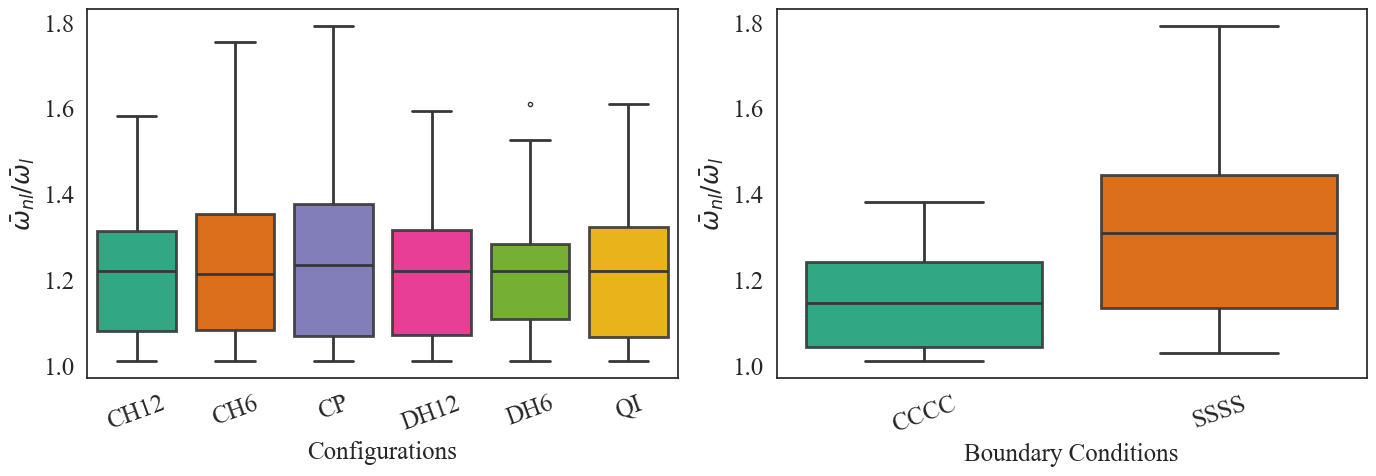

C:\Users\DELL\AppData\Local\Temp\ipykernel_35788\590637718.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\DELL\AppData\Local\Temp\ipykernel_35788\590637718.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


In [14]:

# ------------------ Plot Style Setup ------------------

print("\n--- Generating High-Contrast Colorful Boxplots ---")

# Set high-contrast theme and font scale
sns.set_theme(style="white", font_scale=1.2)

# Define a high-contrast color palette
contrasting_palette = sns.color_palette("Dark2")  # or try "tab10", "colorblind", "Set1"

# Create folder if it doesn't exist
os.makedirs("plots", exist_ok=True)

# ------------------ Dynamic Boxplots for Categorical Features ------------------

# Set global font to Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

n_feats = len(categorical_features_names)

# Determine subplot grid layout (e.g., 2 columns)
n_cols = 2
n_rows = (n_feats + n_cols - 1) // n_cols  # round up

fig, axs = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
axs = axs.flatten()  # flatten in case of multiple rows

for i, cat_feat in enumerate(categorical_features_names):
    sns.boxplot(
        x=cat_feat,
        y=target_column_name,
        data=train_df,
        palette=contrasting_palette,
        linewidth=2,
        fliersize=3,
        saturation=1,
        boxprops=dict(alpha=0.9),
        ax=axs[i]
    )
    # Replace underscores with spaces for labels and titles
    clean_feat_name = cat_feat.replace('_', ' ')
    #axs[i].set_title(f'{target_column_name} by {clean_feat_name}', fontsize=18, weight='bold')
    axs[i].set_xlabel(clean_feat_name, fontsize=18)
    axs[i].set_ylabel(r'$\bar{\omega}_{nl} / \bar{\omega}_{l}$', fontsize=18)
    axs[i].tick_params(axis='x', rotation=20, labelsize=18)
    axs[i].tick_params(axis='y', labelsize=18)


# Hide any unused subplot axes
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.grid(False)
plt.show()


# ------------------ Save Specific Boxplots ------------------

# Plot 1: Nonlinear_Frequency_Ratio by Configurations

plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Configurations',
    y='Nonlinear_Frequency_Ratio',
    data=fulldb,
    palette="tab10",  # high-contrast palette
    linewidth=2,
    fliersize=3,
    saturation=1
)
plt.rcParams["font.family"] = "Times New Roman"
plt.title("Nonlinear Frequency Ratio by Configurations", fontsize=20)
plt.xlabel("Configurations", fontsize=18)
#plt.ylabel(r'$\Omega_{nl} / \Omega_{l}$', fontsize=18)
#plt.ylabel(r'$\omega_{nl} / \omega_{l}$', fontsize=18)
plt.ylabel(r'$\bar{\omega}_{nl} / \bar{\omega}_{l}$', fontsize=18)
plt.xticks(rotation=0,fontsize=16)
plt.yticks(fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.grid(False)
plt.tight_layout()
plt.savefig('plots/Annova_Nonlinear_Frequency_Ratio_by_Configurations.png', dpi=300, bbox_inches='tight')
plt.close()

# Plot 2: Nonlinear_Frequency_Ratio by Boundary_Conditions

plt.rcParams["font.family"] = "Times New Roman"
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Boundary_Conditions',
    y='Nonlinear_Frequency_Ratio',
    data=fulldb,
    palette="colorblind",  # good for contrast and accessibility
    linewidth=2,
    fliersize=3,
    saturation=1
)
plt.rcParams["font.family"] = "Times New Roman"
plt.title("Nonlinear Frequency Ratio by Boundary Conditions", fontsize=20)
plt.xlabel("Boundary Conditions", fontsize=18)
#plt.ylabel(r'$\Omega_{nl} / \Omega_{l}$', fontsize=18)
#plt.ylabel(r'$\omega_{nl} / \omega_{l}$', fontsize=18)
plt.ylabel(r'$\bar{\omega}_{nl} / \bar{\omega}_{l}$', fontsize=18)
plt.xticks(rotation=0,fontsize=16)
plt.yticks(fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.grid(False)
plt.tight_layout()
plt.savefig('plots/Annova_Nonlinear_Frequency_Ratio_by_boundary_conditions.png', dpi=300, bbox_inches='tight')
plt.close()


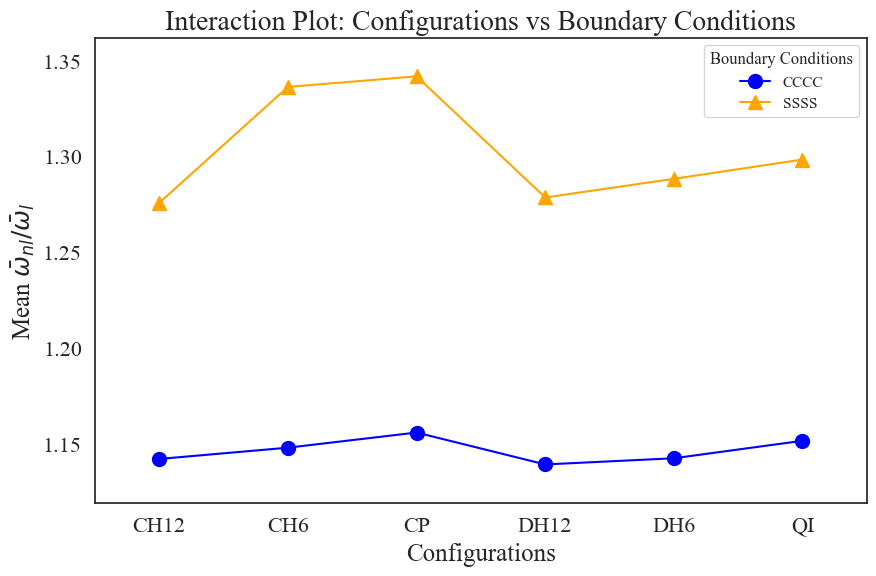

In [15]:

# Ensure output folder exists
os.makedirs("plots", exist_ok=True)

# Choose variables
x_var = 'Configurations'
trace_var = 'Boundary_Conditions'

# Unique levels
trace_levels = train_df[trace_var].astype(str).unique()
n_levels = len(trace_levels)

# Define colors and markers (enough for 2+ levels)
colors = ['blue', 'orange']
markers = ['o', '^']

# Plot
fig = interaction_plot(
    x=train_df[x_var].astype(str),
    trace=train_df[trace_var].astype(str),
    response=train_df[target_column_name],
    colors=colors[:n_levels],
    markers=markers[:n_levels],
    ms=10  # marker size
)

# Enhance appearance
fig.set_size_inches(9, 6)
plt.rcParams["font.family"] = "Times New Roman"
#plt.title(f'Interaction Plot: {x_var} vs {trace_var}', fontsize=18, weight='bold')
plt.title(f'Interaction Plot: Configurations vs Boundary Conditions', fontsize=20)
plt.xlabel(x_var, fontsize=18)
#plt.ylabel(f'Mean {target_column_name}', fontsize=18)
plt.ylabel(r'Mean $\bar{\omega}_{nl} / \bar{\omega}_{l}$', fontsize=18)
plt.grid(True, linestyle='--', alpha=0.5)
plt.grid(False)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=16)

# Update legend remove underscore
handles, labels = plt.gca().get_legend_handles_labels()
labels = [lbl.replace('_', ' ') for lbl in labels]
title_clean = trace_var.replace('_', ' ')  # remove underscores from legend title
plt.legend(handles, labels, title=title_clean, title_fontsize=12, fontsize=11)


# Save and show
plt.tight_layout()
plt.savefig('plots/Annova_Interaction_plot.png', dpi=300, bbox_inches='tight')
plt.show()

#plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

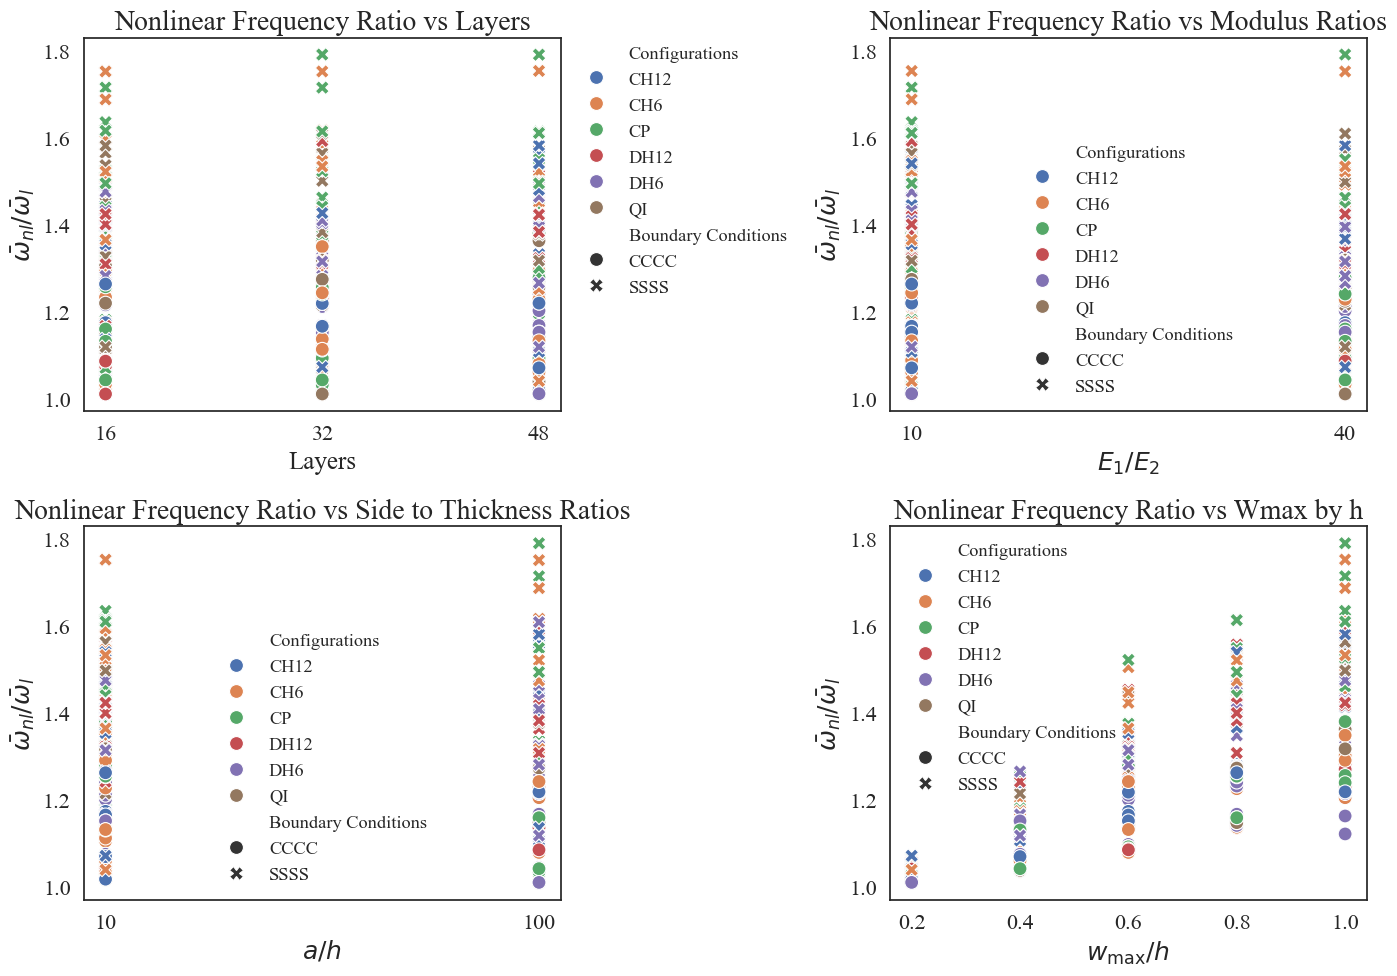

In [16]:

# Set global font to Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

# Custom x-axis labels for specific subplot positions (0-based index)
custom_xlabels = {
    1: r'$E_1 / E_2$',       # Plot 2
    2: r'$a/h$',             # Plot 3
    3: r'$w_{\max} / h$'     # Plot 4
}

# Dictionary mapping numerical features to LaTeX labels (fallback)
latex_labels = {
    "omega_ratio": r'$\bar{\omega}_{nl} / \bar{\omega}_{l}$',
    "omega": r'$\bar{\omega}$',
    "Omega": r'$\Omega$'
}

# Setup subplot grid (2x2)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for idx, num_feat in enumerate(numerical_features_names):
    ax = axs[idx]

    sns.scatterplot(
        x=num_feat, y=target_column_name, data=train_df,
        hue=categorical_features_names[0] if categorical_features_names else None,
        style=categorical_features_names[1] if len(categorical_features_names) > 1 else None,
        ax=ax,
        s=100   # marker size
    )


    clean_num_feat = num_feat.replace('_', ' ')
    clean_target_name = target_column_name.replace('_', ' ')

    # Decide xlabel: custom → latex dict → cleaned name
    if idx in custom_xlabels:
        xlabel_text = custom_xlabels[idx]
    else:
        xlabel_text = latex_labels.get(num_feat, clean_num_feat)

    ax.set_title(f'{clean_target_name} vs {clean_num_feat}', fontsize=20)
    ax.set_xlabel(xlabel_text, fontsize=18)
    ax.set_ylabel(r'$\bar{\omega}_{nl} / \bar{\omega}_{l}$', fontsize=18)

    #ax.grid(True, linestyle='--', alpha=0.7)
     # Show x-ticks exactly at data values
    ax.set_xticks(sorted(train_df[num_feat].unique()))

    # Set xtick and ytick font size
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)

    handles, labels = ax.get_legend_handles_labels()
    labels = [lbl.replace('_', ' ') for lbl in labels]

    if idx == 0:
        ax.legend(handles, labels, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0., frameon=False)
    else:
        ax.legend(handles, labels, loc='best', frameon=False)

# Hide unused subplots if any
for j in range(len(numerical_features_names), len(axs)):
    fig.delaxes(axs[j])
plt.grid(False)
plt.tight_layout()
plt.savefig("plots/scatter/combined_2x2_scatter.png", dpi=300, bbox_inches='tight')
plt.show()


# One Hot Encoding

In [17]:
boundarycat=pd.get_dummies(fulldb["Boundary_Conditions"])
boundarycat

CCCC   SSSS
0     True  False
1     True  False
2     True  False
3     True  False
4     True  False
..     ...    ...
715  False   True
716  False   True
717  False   True
718  False   True
719  False   True

[720 rows x 2 columns]

In [18]:
# One-hot encode each unique category in "Boundary Conditions"
boundarycat = pd.get_dummies(fulldb["Boundary_Conditions"]).astype(int)
boundarycat

CCCC  SSSS
0       1     0
1       1     0
2       1     0
3       1     0
4       1     0
..    ...   ...
715     0     1
716     0     1
717     0     1
718     0     1
719     0     1

[720 rows x 2 columns]

In [19]:
Configurationscat=pd.get_dummies(fulldb.Configurations).astype(int)
Configurationscat

CH12  CH6  CP  DH12  DH6  QI
0       0    0   0     0    1   0
1       0    1   0     0    0   0
2       0    0   0     1    0   0
3       1    0   0     0    0   0
4       0    0   1     0    0   0
..    ...  ...  ..   ...  ...  ..
715     0    1   0     0    0   0
716     0    0   0     1    0   0
717     1    0   0     0    0   0
718     0    0   1     0    0   0
719     0    0   0     0    0   1

[720 rows x 6 columns]

In [20]:
dfnew=pd.concat([fulldb.Layers,boundarycat,fulldb.iloc[:,2:4],Configurationscat,fulldb.iloc[:,-1],fulldb.iloc[:,-2]],axis=1)
dfnew

Layers  CCCC  SSSS  Modulus_Ratios  Side_to_Thickness_Ratios  CH12  CH6  \
0        16     1     0              10                        10     0    0   
1        16     1     0              10                        10     0    1   
2        16     1     0              10                        10     0    0   
3        16     1     0              10                        10     1    0   
4        16     1     0              10                        10     0    0   
..      ...   ...   ...             ...                       ...   ...  ...   
715      48     0     1              40                       100     0    1   
716      48     0     1              40                       100     0    0   
717      48     0     1              40                       100     1    0   
718      48     0     1              40                       100     0    0   
719      48     0     1              40                       100     0    0   

     CP  DH12  DH6  QI  Wmax_by_h  Nonlinear_Frequency_Ratio  
0     0     0    1   0        0.2                     1.0174  
1     0     0    0   0        0.2                     1.0172  
2     0     1    0   0        0.2                     1.0191  
3     0     0    0   0        0.2                     1.0179  
4     1     0    0   0        0.2                     1.0176  
..   ..   ...  ...  ..        ...                        ...  
715   0     0    0   0        1.0                     1.6077  
716   0     1    0   0        1.0                     1.5843  
717   0     0    0   0        1.0                     1.5810  
718   1     0    0   0        1.0                     1.7898  
719   0     0    0   1        1.0                     1.5709  

[720 rows x 13 columns]

In [21]:
dfnew.shape

(720, 13)

In [22]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Layers                     720 non-null    int64  
 1   CCCC                       720 non-null    int32  
 2   SSSS                       720 non-null    int32  
 3   Modulus_Ratios             720 non-null    int64  
 4   Side_to_Thickness_Ratios   720 non-null    int64  
 5   CH12                       720 non-null    int32  
 6   CH6                        720 non-null    int32  
 7   CP                         720 non-null    int32  
 8   DH12                       720 non-null    int32  
 9   DH6                        720 non-null    int32  
 10  QI                         720 non-null    int32  
 11  Wmax_by_h                  720 non-null    float64
 12  Nonlinear_Frequency_Ratio  720 non-null    float64
dtypes: float64(2), int32(8), int64(3)
memory usage: 50

# Multicolinerity Assesment via VIF on dfnew


--- VIF (Variance Inflation Factor) Table ---
           Feature    VIF
2             CCCC  100.0
3             SSSS  100.0
6             CH12  100.0
7              CH6  100.0
8               CP  100.0
9             DH12  100.0
10             DH6  100.0
11              QI  100.0
4      $E_1 / E_2$    1.0
5            $a/h$    1.0
12  $w_{\max} / h$    1.0
1           Layers    1.0


C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\DELL\AppData\Local\Temp\ipykernel_35788\3018552142.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vif_data, x="VIF", y="Feature", palette="mako")


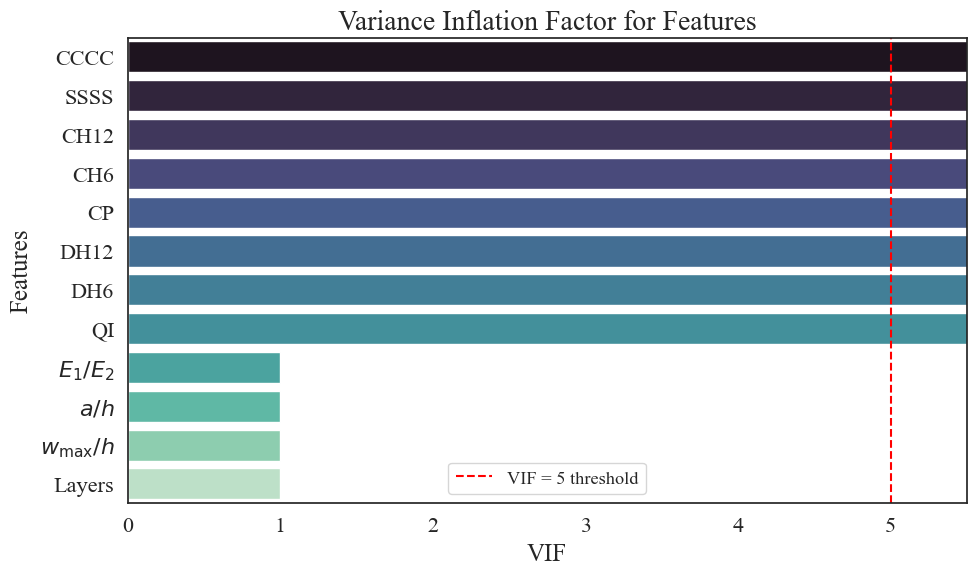

In [23]:

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define target column name
target_column = "Nonlinear_Frequency_Ratio"

# Separate predictors and target
X_full = dfnew.drop(columns=[target_column])
y_full = dfnew[target_column]

# Keep only numeric features for VIF calculation
numerical_X = X_full.select_dtypes(include=[np.number])

# Add constant (intercept) for VIF calculation
X_with_const = sm.add_constant(numerical_X)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i)
                   for i in range(X_with_const.shape[1])]

# Remove the intercept row
vif_data = vif_data[vif_data["Feature"] != "const"]

# Replace infinite VIF values with a cap
vif_data = vif_data.replace(np.inf, 100)

# Sort by VIF value
vif_data = vif_data.sort_values(by="VIF", ascending=False)

# --- Custom rename mapping ---
rename_map = {
    "Modulus_Ratios": r"$E_1 / E_2$",
    "Side_to_Thickness_Ratios": r"$a/h$",
    "Wmax_by_h": r"$w_{\max} / h$",
    # add more mappings here if needed
}
vif_data["Feature"] = vif_data["Feature"].replace(rename_map)

# Show VIF table
print("\n--- VIF (Variance Inflation Factor) Table ---")
print(vif_data)

# Plot VIF values
plt.figure(figsize=(10, 6))
sns.barplot(data=vif_data, x="VIF", y="Feature", palette="mako")
plt.axvline(x=5, color='red', linestyle='--', label='VIF = 5 threshold')
plt.title("Variance Inflation Factor for Features",fontsize=20)
plt.xlabel("VIF",fontsize=18)
plt.ylabel("Features",fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.grid(False)
plt.legend()
plt.xlim(0, 5.5)
plt.tight_layout()
plt.savefig('plots/VIF_plot.png', dpi=300, bbox_inches='tight')
plt.show()



--- VIF Table After Manual Feature Drop ---
                     Feature       VIF
5                       CH12  1.666667
6                        CH6  1.666667
7                         CP  1.666667
8                       DH12  1.666667
9                        DH6  1.666667
3             Modulus_Ratios  1.000000
4   Side_to_Thickness_Ratios  1.000000
10                 Wmax_by_h  1.000000
1                     Layers  1.000000
2                       SSSS  1.000000


C:\Users\DELL\AppData\Local\Temp\ipykernel_35788\1180541576.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vif_df, x="VIF", y="Feature", palette="viridis")


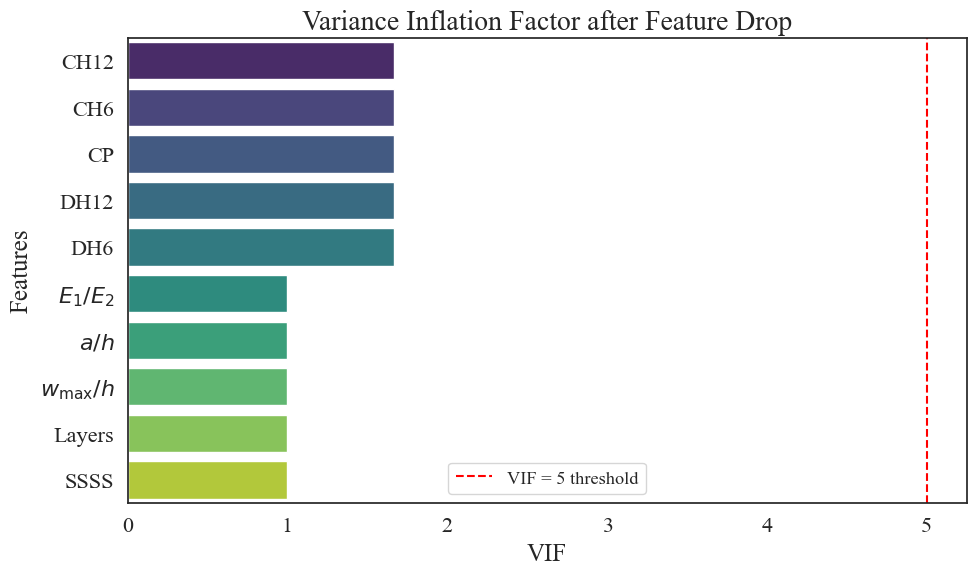

In [24]:

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



# Define the features you want to drop
features_to_drop = ['CCCC', 'QI']

# Drop those columns from dfnew
df_dropped = dfnew.drop(columns=features_to_drop, errors="ignore")  

# Separate predictors (all columns except last) and target (last column)
X_final = df_dropped.iloc[:, :-1]
y = df_dropped.iloc[:, -1]



# 6. VIF Calculation
X_vif = sm.add_constant(X_final)
vif_df = pd.DataFrame()
vif_df["Feature"] = X_vif.columns
vif_df["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif_df = vif_df[vif_df["Feature"] != "const"]
vif_df = vif_df.sort_values(by="VIF", ascending=False)

# 7. Display and plot VIF
# 7. Display and plot VIF
print("\n--- VIF Table After Manual Feature Drop ---")
print(vif_df)

# Replace underscores with spaces
#vif_df['Feature'] = vif_df['Feature'].str.replace('_', ' ', regex=False)

# Custom rename mapping
rename_map = {
    "Modulus_Ratios": r"$E_1 / E_2$",
    "Side_to_Thickness_Ratios": r"$a/h$",
    "Wmax_by_h": r"$w_{\max} / h$",
    # add more mappings here if needed
}

# Apply mapping
vif_df['Feature'] = vif_df['Feature'].replace(rename_map)

plt.figure(figsize=(10, 6))
sns.barplot(data=vif_df, x="VIF", y="Feature", palette="viridis")
plt.axvline(x=5, color='red', linestyle='--', label='VIF = 5 threshold')
plt.title("Variance Inflation Factor after Feature Drop",fontsize=20)
plt.xlabel("VIF", fontsize=18)
plt.ylabel("Features", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.savefig('plots/VIF_plot_multicolineariti.png', dpi=300, bbox_inches='tight')
plt.show()


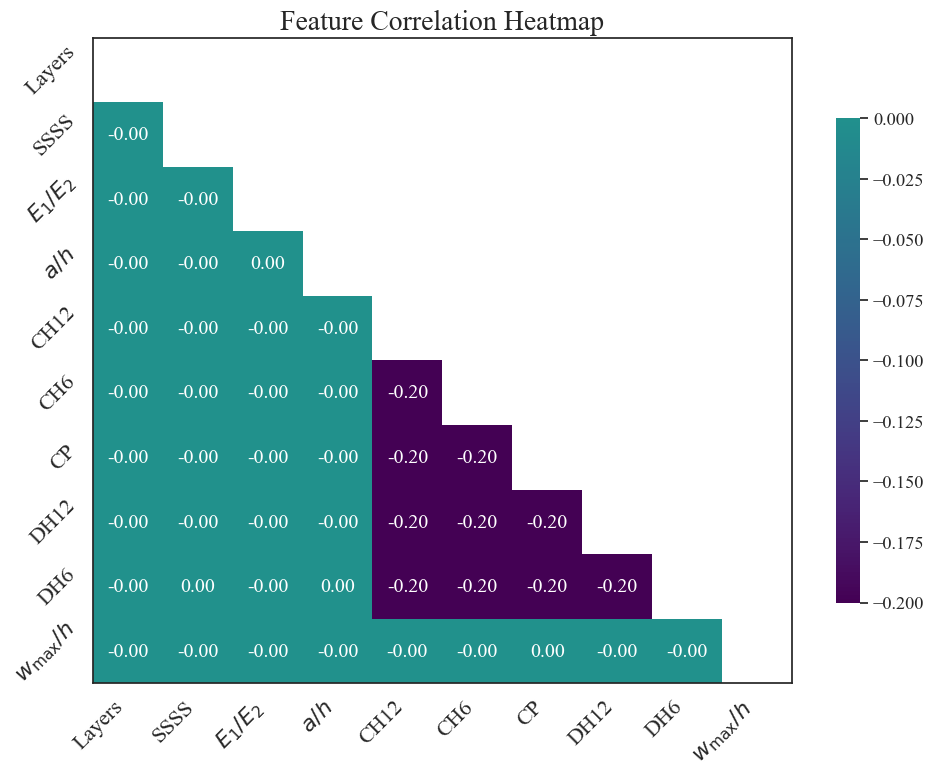

In [25]:
# Compute correlation matrix
corr_matrix = X_final.corr()

# Remove underscores for a cleaner base
#corr_matrix.columns = corr_matrix.columns.str.replace('_', ' ')
#corr_matrix.index = corr_matrix.index.str.replace('_', ' ')

# Create mapping for specific renaming
rename_map = {
    "Modulus_Ratios": r"$E_1 / E_2$",
    "Side_to_Thickness_Ratios": r"$a/h$",
    "Wmax_by_h": r"$w_{\max} / h$",
    # add more mappings here if needed
}

# Apply mapping
corr_matrix.columns = [rename_map.get(col, col) for col in corr_matrix.columns]
corr_matrix.index = [rename_map.get(row, row) for row in corr_matrix.index]

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap='viridis',
    center=0,
    linewidths=0,
    cbar_kws={"shrink": 0.75}
)

# Set tick fonts
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16, rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16, rotation=45)
ax.grid(False)
# Explicitly ensure borders are visible
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.title("Feature Correlation Heatmap", fontsize=20)
plt.tight_layout()
plt.savefig('plots/VIF_feature_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


In [26]:
# Make a new dataframe combining predictors and target after removing multicolinirety and use this for the further analysis
dfnew = pd.concat([X_final, y], axis=1)
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Layers                     720 non-null    int64  
 1   SSSS                       720 non-null    int32  
 2   Modulus_Ratios             720 non-null    int64  
 3   Side_to_Thickness_Ratios   720 non-null    int64  
 4   CH12                       720 non-null    int32  
 5   CH6                        720 non-null    int32  
 6   CP                         720 non-null    int32  
 7   DH12                       720 non-null    int32  
 8   DH6                        720 non-null    int32  
 9   Wmax_by_h                  720 non-null    float64
 10  Nonlinear_Frequency_Ratio  720 non-null    float64
dtypes: float64(2), int32(6), int64(3)
memory usage: 45.1 KB


## Run the workflow for building regressor models and saving the best hyperparameters and results

### Define models 

In [27]:
# Define models
models = {
    "Linear": LinearRegression(),  # No hyperparameters to optimize
    "KNR": KNeighborsRegressor(),
    "SVR": SVR(),
    "DTR": DecisionTreeRegressor(),      # Decision Tree Regressor
    "GBR": GradientBoostingRegressor(),
    "RFR": RandomForestRegressor(),
    "ETR": ExtraTreesRegressor(),        # Extra Trees Regressor
    "XGBR": XGBRegressor(),
    "NeuralNetwork": None  # NN model will be dynamically created in the workflow
}

### Define hyperparameter spaces for optimization

In [28]:
# Define hyperparameter spaces for optimization
param_spaces = {
    "Linear": {},  # even if no hyperparameters
    "KNR": {
        "n_neighbors": Integer(1, 15),                 # Number of neighbors
        "weights": Categorical(["uniform", "distance"]),  # Weight function
        "algorithm": Categorical(["auto", "ball_tree", "kd_tree", "brute"]),  # Search algorithm
        "p": Integer(1, 2)                             # Distance metric: 1=Manhattan, 2=Euclidean
     },
    "SVR": {
        "C": Real(0.1, 10.0),        # Regularization parameter
        "epsilon": Real(0.01, 1.0),  # Epsilon-tube within which no penalty is associated
        "kernel": Categorical(["linear", "rbf"])
    },
    "DTR": {
        "max_depth": Integer(3, 10),                        # Maximum depth of the tree
        "min_samples_split": Integer(2, 20),               # Min samples required to split an internal node
        "min_samples_leaf": Integer(1, 20),                # Min samples required to be at a leaf node
        "max_features": Categorical([None, "sqrt", "log2"]),  # Number of features to consider for best split
        "criterion": Categorical(["squared_error", "friedman_mse", "absolute_error"])
    },
    "GBR": {
        "n_estimators": Integer(3, 10),   # Number of boosting stages
        "loss": Categorical(['squared_error', 'absolute_error', 'huber', 'quantile']), # Loss function to be optimized
        "learning_rate": Real(0.005, 0.9),   # Step size shrinkage
        "alpha": Real(0.005, 0.9, prior="log-uniform"), # alpha-quantile of the huber and quantile loss function
        "max_depth": Integer(3, 10)         # Maximum depth of each tree
    },
    "RFR": {
        "n_estimators": Integer(3, 10),   # Number of trees
        "max_depth": Integer(3, 10)         # Maximum depth of trees
    },
    "ETR": {
        "n_estimators": Integer(3, 10),                      # Number of trees
        "max_depth": Integer(3, 10),                             # Maximum depth of each tree
        "min_samples_split": Integer(2, 20),                     # Min samples to split a node
        "min_samples_leaf": Integer(1, 20),                      # Min samples at a leaf node
        "max_features": Categorical([None, "sqrt", "log2"]),  # Features to consider at each split
        "bootstrap": Categorical([True, False])                  # Bootstrap samples or not
    },
    "XGBR": {
        "n_estimators": Integer(3, 10),   # Number of trees
        "learning_rate": Real(0.005, 0.9),   # Learning rate
        "max_depth": Integer(3, 10)         # Maximum depth of trees
    },
    "NeuralNetwork": {
        "hidden_layers": Integer(1, 3),     # Number of hidden layers
        "units": Integer(32, 128),          # Number of units per layer
        "activation": Categorical(['relu', 'tanh']),  # Activation function
        "learning_rate": Real(1e-6, 1e-2, prior='log-uniform')  # Learning rate
    }
}

### Import the run_workflow function from workflow.py   with time

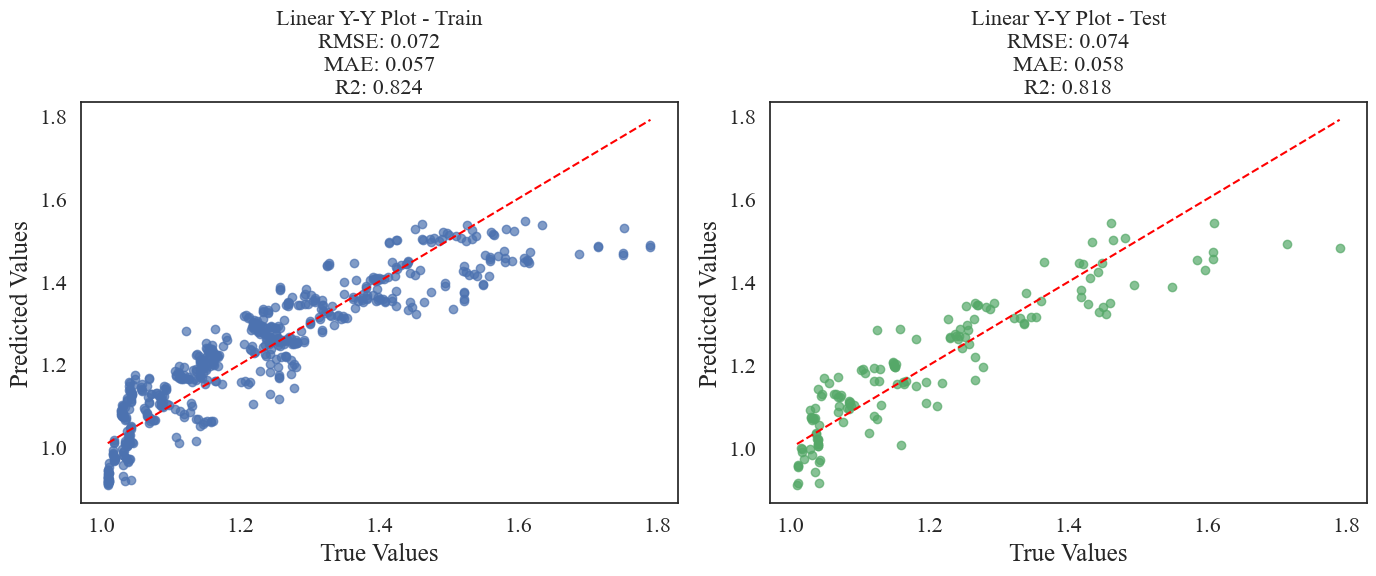

Plot saved for Linear: plots\Linear_yy_plot.png


C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 'uniform', 'brute', 2] before, using random point [1, 'distance', 'ball_tree', 1]
  warnings.warn(
C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 'uniform', 'brute', 2] before, using random point [8, 'distance', 'auto', 1]
  warnings.warn(
C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 'uniform', 'brute', 2] before, using random point [14, 'distance', 'ball_tree', 2]
  warnings.warn(
C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 'uniform', 'brute', 2] before, using random point [11, 'distance', 'ball_tree', 2]
  warnings.warn(
C:\Users\DELL\anaconda3\envs\tf\lib

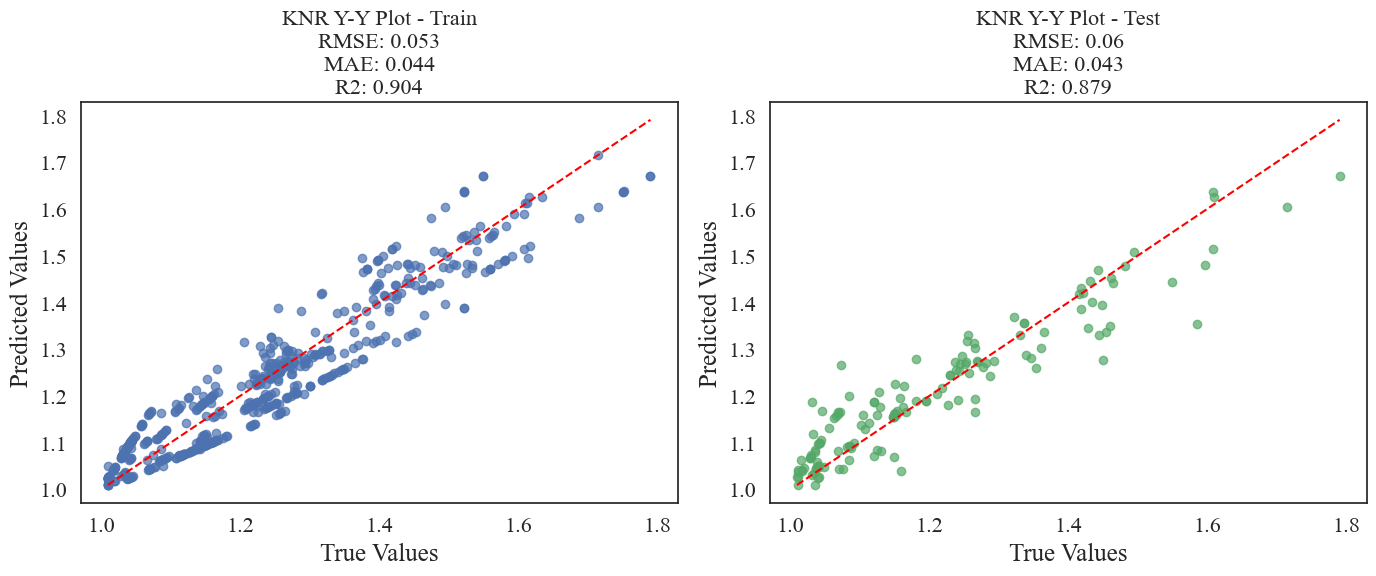

Plot saved for KNR: plots\KNR_yy_plot.png


C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10.0, 0.01, 'rbf'] before, using random point [6.388974362515417, 0.8372607678538856, 'linear']
  warnings.warn(
C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10.0, 0.01, 'rbf'] before, using random point [1.0658617234104952, 0.10282279189466391, 'linear']
  warnings.warn(
C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10.0, 0.01, 'rbf'] before, using random point [8.853140319286025, 0.7147127006237118, 'linear']
  warnings.warn(
C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10.0, 0.01, 'rbf'] before, using random point [4.364520224930682, 0.5872456834109101, 'linear']
  w

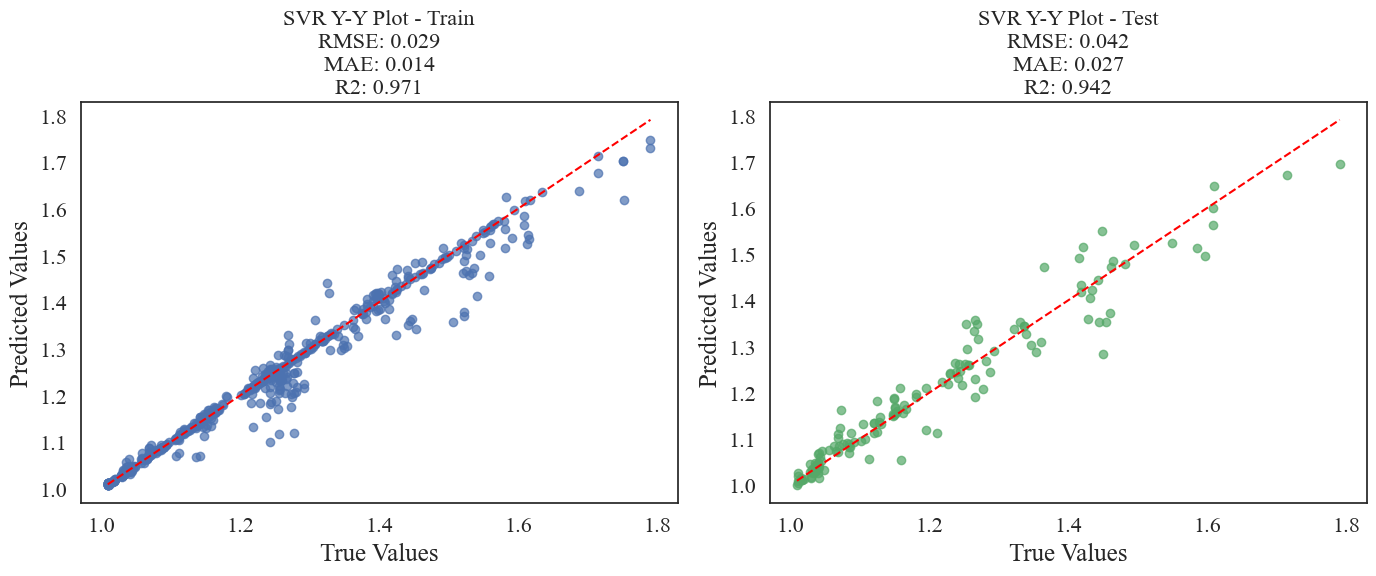

Plot saved for SVR: plots\SVR_yy_plot.png


C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [7, 2, 1, None, 'squared_error'] before, using random point [5, 18, 9, 'sqrt', 'squared_error']
  warnings.warn(
C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [9, 2, 1, None, 'friedman_mse'] before, using random point [8, 10, 17, None, 'absolute_error']
  warnings.warn(
C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [8, 2, 1, None, 'friedman_mse'] before, using random point [7, 10, 13, 'sqrt', 'friedman_mse']
  warnings.warn(
C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [9, 2, 1, None, 'friedman_mse'] before, using random point [10, 12, 12, 'log2', 'friedman_mse']
  warnings.

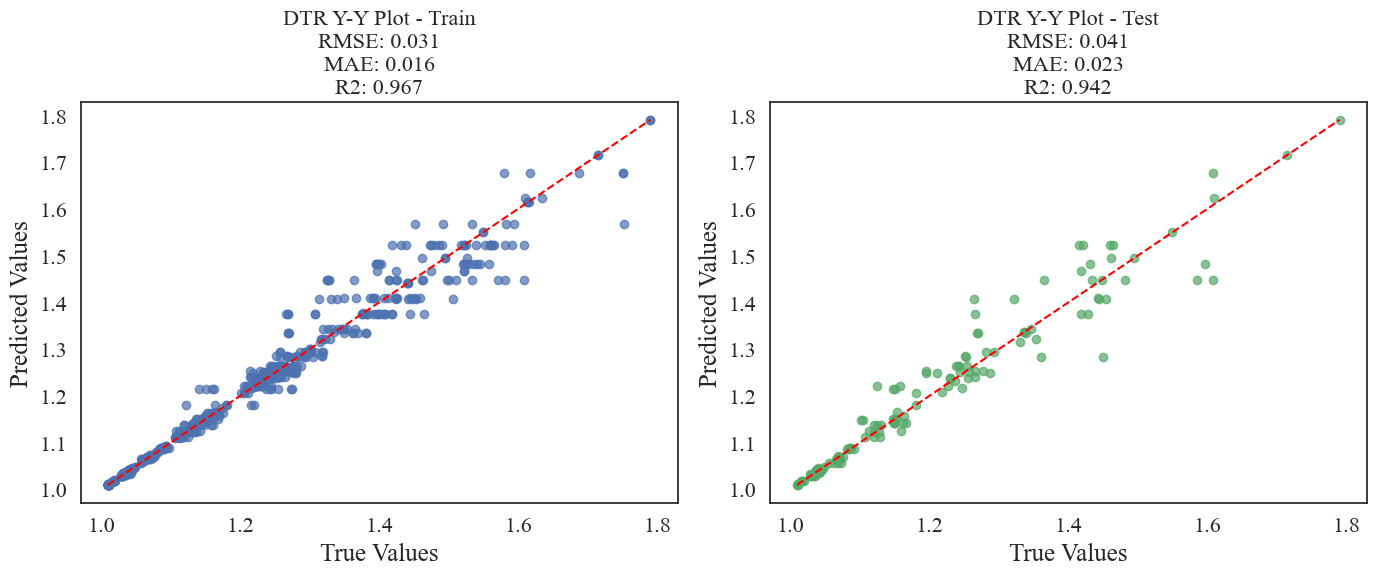

Plot saved for DTR: plots\DTR_yy_plot.png


C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 'squared_error', 0.9, 0.8999999999999998, 10] before, using random point [8, 'quantile', 0.4232396651920882, 0.17366861616687382, 7]
  warnings.warn(
C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 'squared_error', 0.9, 0.8999999999999998, 10] before, using random point [7, 'quantile', 0.13901282082543673, 0.03899682723162292, 3]
  warnings.warn(
C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


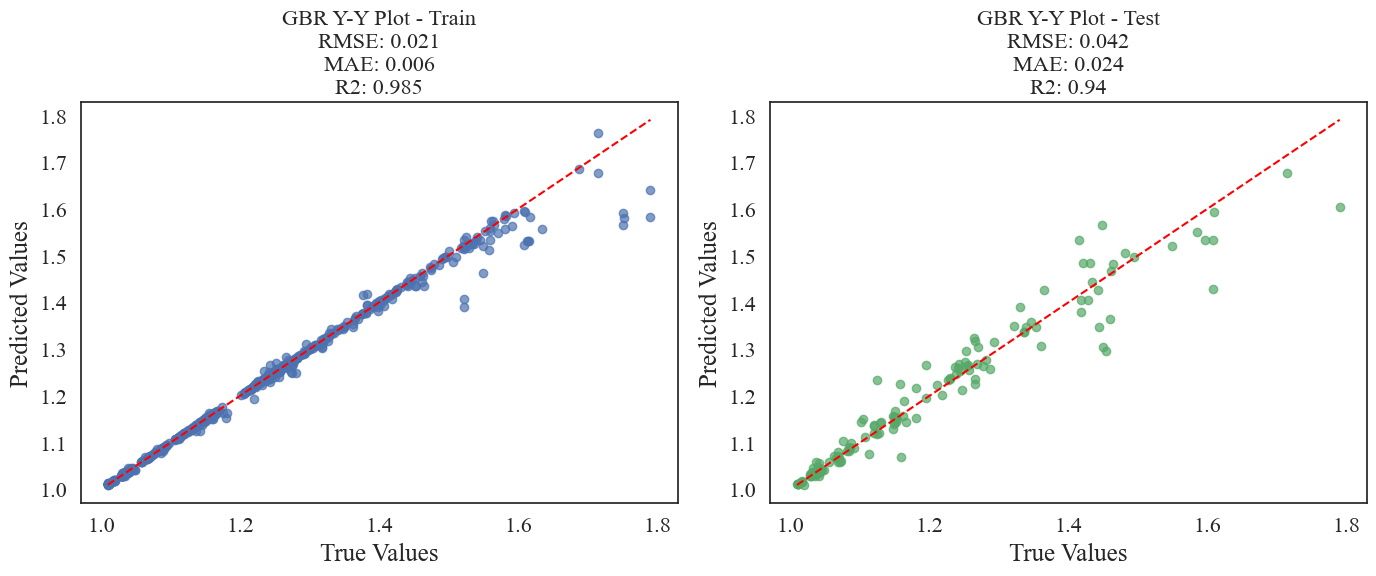

Plot saved for GBR: plots\GBR_yy_plot.png


C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 9] before, using random point [6, 3]
  warnings.warn(
C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 9] before, using random point [4, 4]
  warnings.warn(
C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 9] before, using random point [10, 6]
  warnings.warn(
C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 9] before, using random point [8, 6]
  warnings.warn(
C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 9] before, using random point [4, 4]
  warnings.warn(
C:\Users\

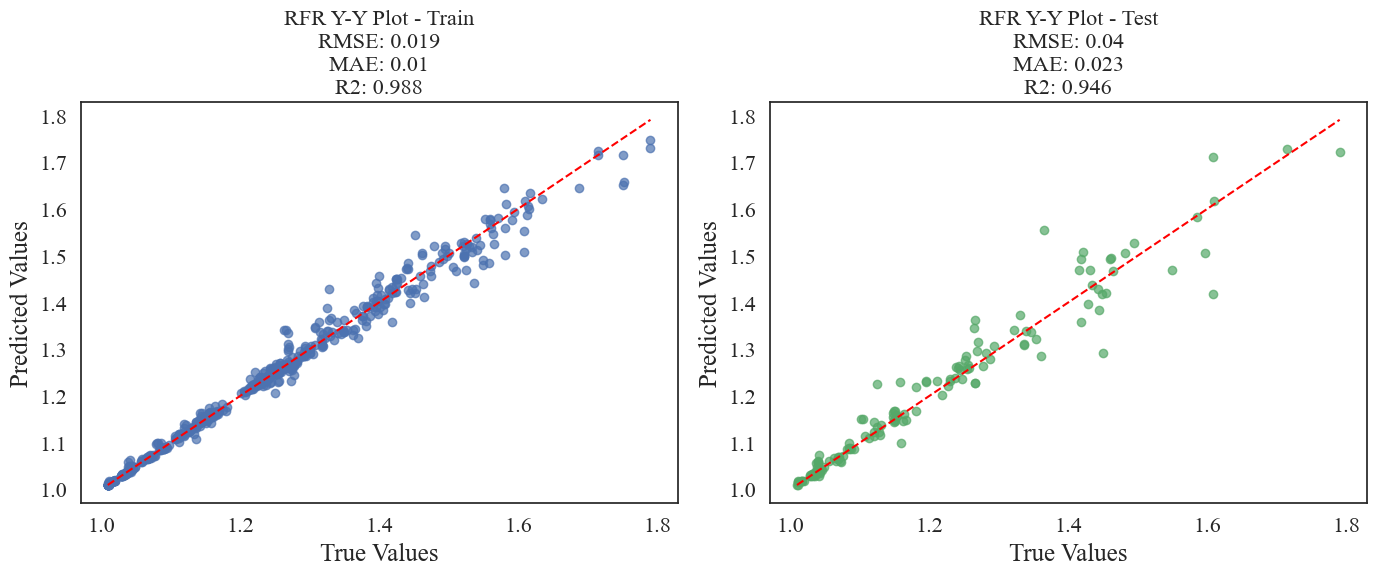

Plot saved for RFR: plots\RFR_yy_plot.png


C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 10, 2, 1, None, True] before, using random point [6, 7, 12, 19, None, True]
  warnings.warn(
C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 10, 2, 1, None, True] before, using random point [6, 8, 11, 5, None, False]
  warnings.warn(
C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 10, 2, 1, None, True] before, using random point [10, 4, 10, 3, 'log2', True]
  warnings.warn(
C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 9, 2, 1, None, True] before, using random point [5, 8, 7, 6, 'log2', False]
  warnings.warn(
C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\

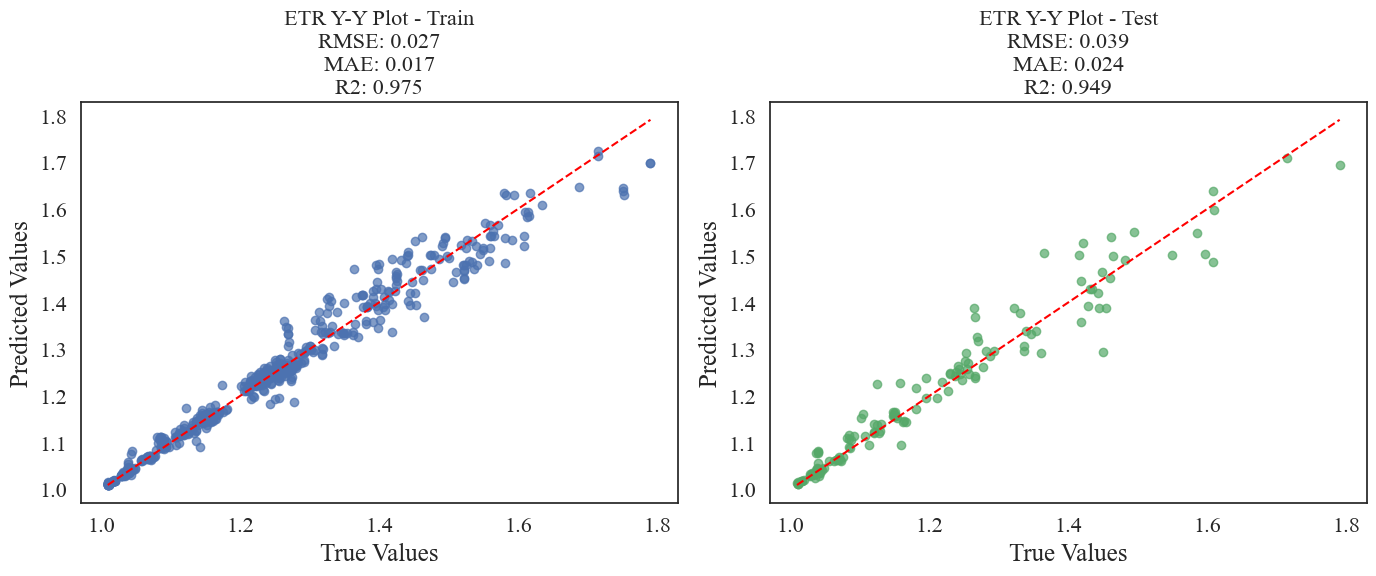

Plot saved for ETR: plots\ETR_yy_plot.png


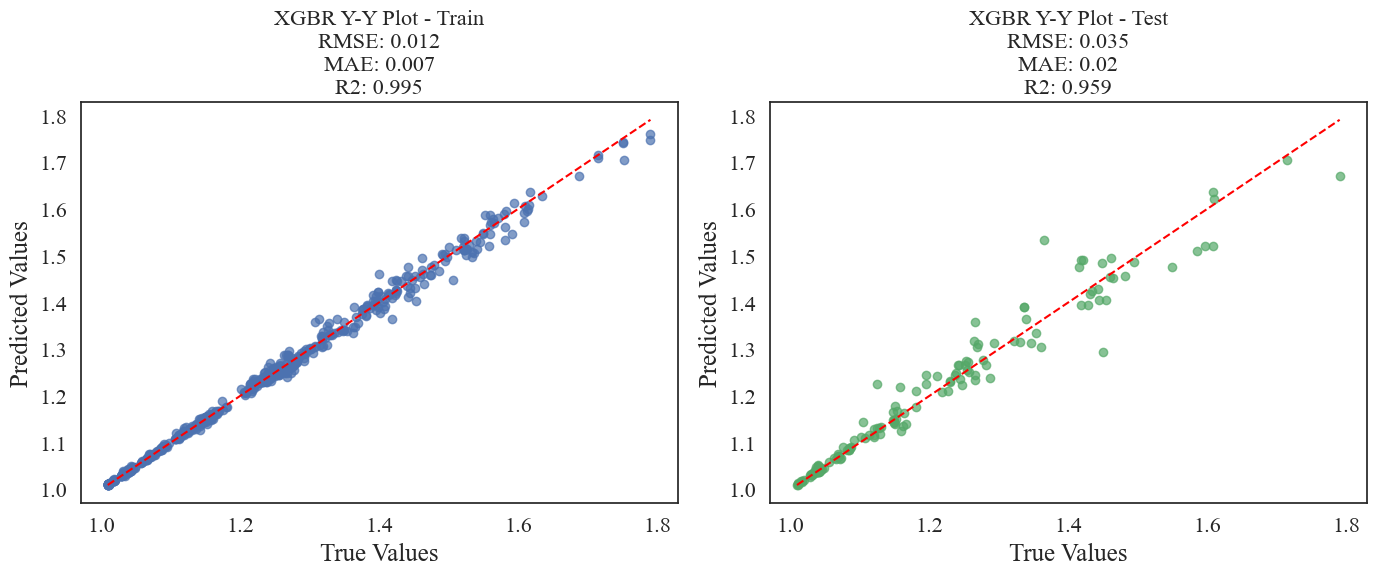

Plot saved for XGBR: plots\XGBR_yy_plot.png
5/5 [==============================] - 0s 3ms/step


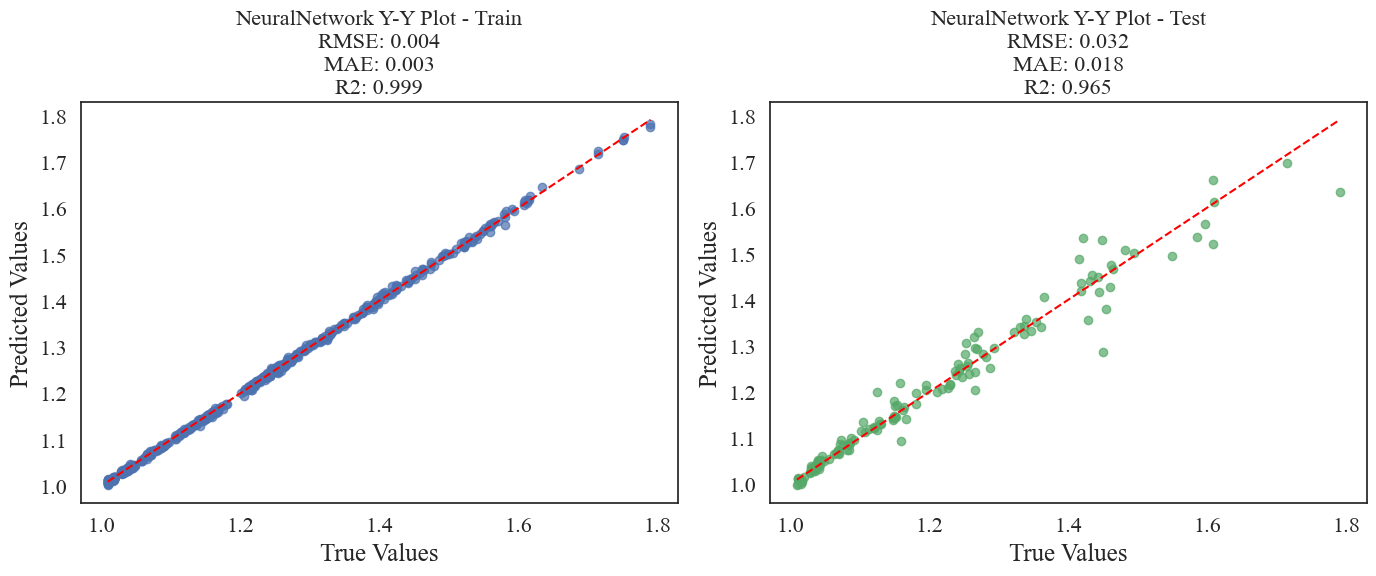

Plot saved for NeuralNetwork: plots\NeuralNetwork_yy_plot.png
Results saved to results.csv
           Model                                        Best Params  Train R2  \
0         Linear                                                 {}     0.824   
1            KNR  {'n_neighbors': 2, 'weights': 'uniform', 'algo...     0.904   
2            SVR  {'C': 6.5484932492936085, 'epsilon': 0.01, 'ke...     0.971   
3            DTR  {'max_depth': 7, 'min_samples_split': 2, 'min_...     0.967   
4            GBR  {'n_estimators': 6, 'loss': 'huber', 'learning...     0.985   
5            RFR                {'n_estimators': 9, 'max_depth': 9}     0.988   
6            ETR  {'n_estimators': 10, 'max_depth': 8, 'min_samp...     0.975   
7           XGBR  {'n_estimators': 10, 'learning_rate': 0.526652...     0.995   
8  NeuralNetwork  {'hidden_layers': 3, 'units': 128, 'activation...     0.999   

   Train MAE  Train RMSE  Test R2  Test MAE  Test RMSE  Optimization Time (s)  \
0      0.057     

In [29]:
# Import the run_workflow function from workflow.py
from mlregworkflow_update2 import run_workflow

# Split the data into features (X) and response (y)
# Prepare features and target
X = np.array(dfnew.iloc[:, :-1])
y = np.array(dfnew.iloc[:, -1])

# Convert y to 2D array if it's 1D
# This is necessary for compatibility with some models and functions
if len(y.shape) == 1:
    y = y.reshape(-1, 1)

# Run the workflow
results_df = run_workflow(X, y, models, param_spaces)

# Display the results DataFrame
print(results_df)

In [30]:
results_df

Model                                        Best Params  Train R2  \
0         Linear                                                 {}     0.824   
1            KNR  {'n_neighbors': 2, 'weights': 'uniform', 'algo...     0.904   
2            SVR  {'C': 6.5484932492936085, 'epsilon': 0.01, 'ke...     0.971   
3            DTR  {'max_depth': 7, 'min_samples_split': 2, 'min_...     0.967   
4            GBR  {'n_estimators': 6, 'loss': 'huber', 'learning...     0.985   
5            RFR                {'n_estimators': 9, 'max_depth': 9}     0.988   
6            ETR  {'n_estimators': 10, 'max_depth': 8, 'min_samp...     0.975   
7           XGBR  {'n_estimators': 10, 'learning_rate': 0.526652...     0.995   
8  NeuralNetwork  {'hidden_layers': 3, 'units': 128, 'activation...     0.999   

   Train MAE  Train RMSE  Test R2  Test MAE  Test RMSE  Optimization Time (s)  \
0      0.057       0.072    0.818     0.058      0.074               0.011290   
1      0.044       0.053    0.879     0.043      0.060             184.186154   
2      0.014       0.029    0.942     0.027      0.042             127.712889   
3      0.016       0.031    0.942     0.023      0.041             181.835580   
4      0.006       0.021    0.940     0.024      0.042             212.653854   
5      0.010       0.019    0.946     0.023      0.040             104.837404   
6      0.017       0.027    0.949     0.024      0.039             173.548100   
7      0.007       0.012    0.959     0.020      0.035             133.945205   
8      0.003       0.004    0.965     0.018      0.032            3860.383420   

   Training Time (s)  
0           0.001235  
1           0.000992  
2           0.111190  
3           0.001887  
4           0.377526  
5           0.021066  
6           0.015993  
7           0.313263  
8           6.454508

In [31]:
model_names = ['Linear','KNR', 'SVR','DTR', 'GBR', 'RFR', 'ETR', 'XGBR', 'NNR']

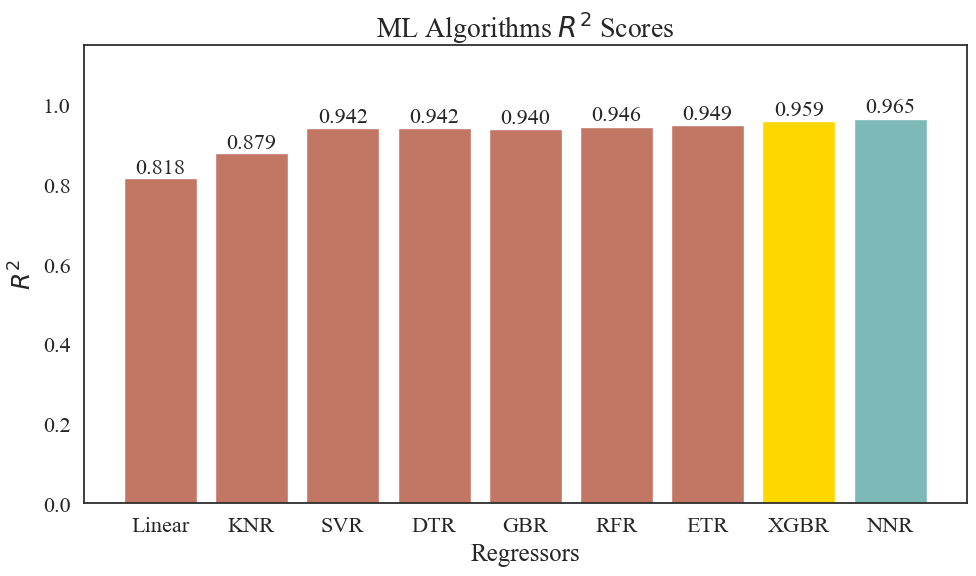

In [32]:
# Plotting R2 of all ML models
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

performance = results_df.iloc[:, 5]

# Find best and second best values
best_val = performance.max()
second_best_val = performance.nlargest(2).iloc[-1]  # second highest

# Assign colors: best = teal, second best = gold, others = red-brown
colors = np.where(
    performance == best_val, '#7DB9B6',   # best
    np.where(performance == second_best_val, '#FFD700', '#C27664')  # second best
)

bar = ax.bar(model_names, performance, color=colors)

ax.set_xlabel('Regressors', fontsize=18)
ax.set_ylabel('$R^2$', fontsize=18)
ax.set_title('ML Algorithms $R^2$ Scores', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + 0.5*rect.get_width(), 1.03*height,
                 '%.3f' % height,
                 ha='center', va='center', fontsize=16)

autolabel(bar)

ax.set_ylim(0, 1.15)
plt.grid(False)
plt.tight_layout()
plt.show()

fig.savefig('plots/R2 comparison plot.png', dpi=300, bbox_inches='tight')


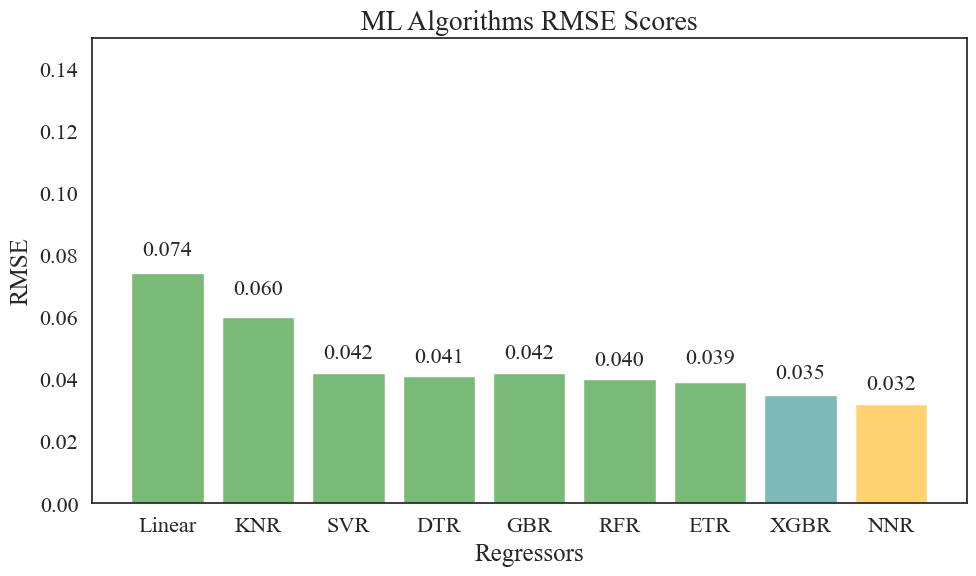

In [33]:
# Plotting RMSE of all ML models
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

performance = results_df.iloc[:, 7]

# Find best (lowest) and second best RMSE
best_val = performance.min()
second_best_val = performance.nsmallest(2).iloc[-1]  # second lowest

# Assign colors: best = gold, second best = teal, others = green
colors = np.where(
    performance == best_val, '#FFD372',   # best (lowest RMSE)
    np.where(performance == second_best_val, '#7DB9B6', '#7ABA78')  # second best
)

bar = ax.bar(model_names, performance, color=colors)

ax.set_xlabel('Regressors', fontsize=18)
ax.set_ylabel('RMSE', fontsize=18)
ax.set_title('ML Algorithms RMSE Scores', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if 0.01 <= height < 0.04:
            plt.text(rect.get_x() + 0.5*rect.get_width(), 1.2*height,
                     '%.3f' % height, ha='center', va='center', fontsize=16)
        elif 0.04 <= height < 0.07:
            plt.text(rect.get_x() + 0.5*rect.get_width(), 1.15*height,
                     '%.3f' % height, ha='center', va='center', fontsize=16)
        else:
            plt.text(rect.get_x() + 0.5*rect.get_width(), 1.1*height,
                     '%.3f' % height, ha='center', va='center', fontsize=16)

autolabel(bar)

ax.set_ylim(0, 0.15)
plt.grid(False)
fig.tight_layout()
plt.show()

fig.savefig('plots/RMSE comparison plot.png', dpi=300, bbox_inches='tight')


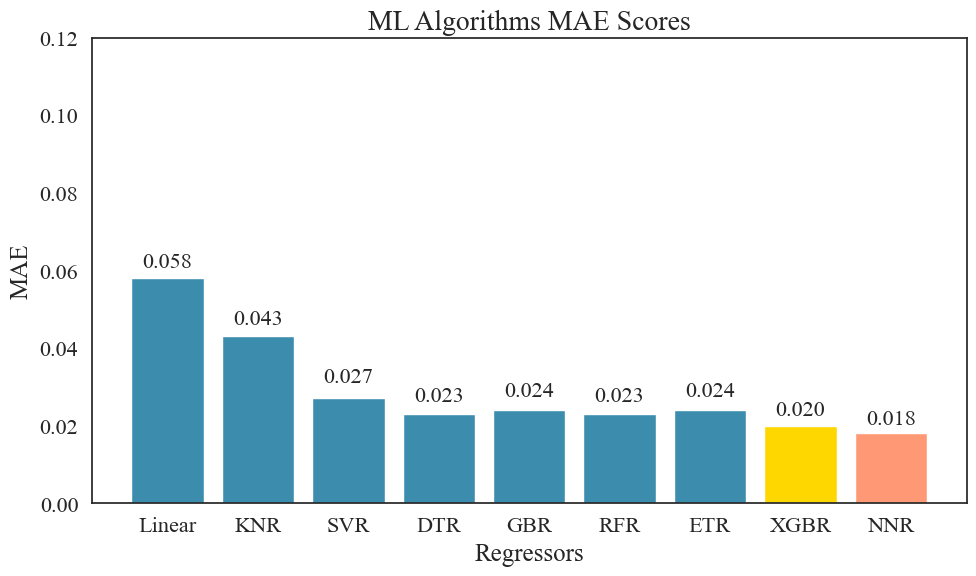

In [34]:
# Plotting MAE of all ML models
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

performance = results_df.iloc[:, 6]

# Find best (lowest) and second best MAE
best_val = performance.min()
second_best_val = performance.nsmallest(2).iloc[-1]  # second lowest

# Assign colors: best = coral, second best = gold, others = blue
colors = np.where(
    performance == best_val, '#FF9874',   # best (lowest MAE)
    np.where(performance == second_best_val, '#FFD700', '#3C8DAD')  # second best
)

bar = ax.bar(model_names, performance, color=colors)

ax.set_xlabel('Regressors', fontsize=18)
ax.set_ylabel('MAE', fontsize=18)
ax.set_title('ML Algorithms MAE Scores', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if 0.01 <= height < 0.029:
            plt.text(rect.get_x() + 0.5*rect.get_width(), 1.2*height,
                     '%.3f' % height, ha='center', va='center', fontsize=16)
        elif 0.029 <= height < 0.058:
            plt.text(rect.get_x() + 0.5*rect.get_width(), 1.1*height,
                     '%.3f' % height, ha='center', va='center', fontsize=16)
        else:
            plt.text(rect.get_x() + 0.5*rect.get_width(), 1.07*height,
                     '%.3f' % height, ha='center', va='center', fontsize=16)

autolabel(bar)

ax.set_ylim(0, 0.12)
plt.grid(False)
plt.tight_layout()
plt.show()

fig.savefig('plots/MAE comparison plot.png', dpi=300, bbox_inches='tight')


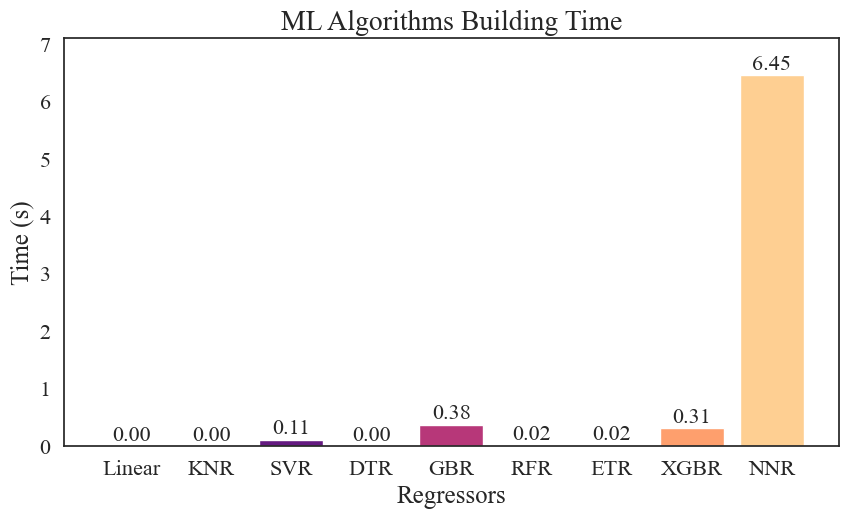

In [35]:

# Given model names
#model_names = ['Linear','KNR', 'SVR','DTR', 'GBR', 'RFR', 'ETR', 'XGBR', 'NNR']

# Extract model building times from results_df
mod_time = results_df.iloc[:, 9]

# Create a magma palette for all bars
palette_colors = sns.color_palette("magma", len(model_names))

# Override the color for the minimum value
colors = []
min_val = min(mod_time)
for i, val in enumerate(mod_time):
    if val == min_val:
        colors.append('#FF9874')  # Highlight color
    else:
        colors.append(palette_colors[i])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar = ax.bar(model_names, mod_time, color=colors)

# Add value labels
for index, val in enumerate(mod_time):
    ax.text(index, val + 0.01, f"{val:.2f}",
            ha='center', va='bottom', fontsize=16)

# Labels & formatting
ax.set_xlabel('Regressors', fontsize=18)
ax.set_ylabel('Time (s)', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylim(0, max(mod_time) * 1.1)
ax.set_title('ML Algorithms Building Time', fontsize=20)
ax.grid(False)

# Rotate labels & adjust layout
plt.xticks(rotation=0, ha='center')
plt.subplots_adjust(bottom=0.2)

# Save and show
fig.savefig('plots/Model_Building_Time_plot.png', dpi=300, bbox_inches='tight')
plt.show()


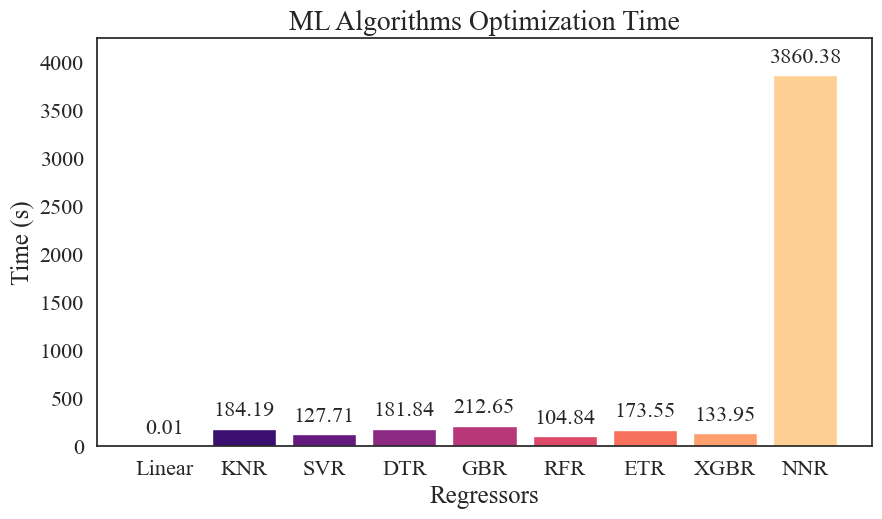

In [36]:

# Example model names and mock results
#model_names = ['Linear', 'KNR', 'SVR', 'DTR', 'GBR', 'RFR', 'ETR', 'XGBR', 'NNR']
optm_time = results_df.iloc[:, 8].values  # Assuming this column has the times

# Create color palette
palette = sns.color_palette('magma', len(model_names))
colors = [palette[i] for i in range(len(model_names))]

# Highlight the minimum value
min_index = np.argmin(optm_time)
colors[min_index] = '#FF9874'  # custom highlight color

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(model_names, optm_time, color=colors)

# Add value labels on each bar
for i, val in enumerate(optm_time):
    ax.text(i, val + 0.02 * max(optm_time), f"{val:.2f}",
            ha='center', va='bottom', fontsize=16)

# Labels and formatting
ax.set_xlabel('Regressors', fontsize=18)
ax.set_ylabel('Time (s)', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylim(0, max(optm_time) * 1.1)
ax.set_title('ML Algorithms Optimization Time', fontsize=20)
plt.grid(False)

# Rotate x labels for better fit
plt.xticks(rotation=0, ha='center')

# Save & show
plt.subplots_adjust(bottom=0.2)
fig.savefig('plots/Model_Optimization_Time_plot.png', dpi=300, bbox_inches='tight')
plt.show()


# SHAP Analysis

In [37]:
# Extract the best parameters for XGBoost Regressor
params_xgbr = results_df.loc[results_df['Model'] == 'XGBR', 'Best Params'].values[0]
params_xgbr

{'n_estimators': 10, 'learning_rate': 0.5266527416712523, 'max_depth': 7}

In [38]:
dfnew

Layers  SSSS  Modulus_Ratios  Side_to_Thickness_Ratios  CH12  CH6  CP  \
0        16     0              10                        10     0    0   0   
1        16     0              10                        10     0    1   0   
2        16     0              10                        10     0    0   0   
3        16     0              10                        10     1    0   0   
4        16     0              10                        10     0    0   1   
..      ...   ...             ...                       ...   ...  ...  ..   
715      48     1              40                       100     0    1   0   
716      48     1              40                       100     0    0   0   
717      48     1              40                       100     1    0   0   
718      48     1              40                       100     0    0   1   
719      48     1              40                       100     0    0   0   

     DH12  DH6  Wmax_by_h  Nonlinear_Frequency_Ratio  
0       0    1        0.2                     1.0174  
1       0    0        0.2                     1.0172  
2       1    0        0.2                     1.0191  
3       0    0        0.2                     1.0179  
4       0    0        0.2                     1.0176  
..    ...  ...        ...                        ...  
715     0    0        1.0                     1.6077  
716     1    0        1.0                     1.5843  
717     0    0        1.0                     1.5810  
718     0    0        1.0                     1.7898  
719     0    0        1.0                     1.5709  

[720 rows x 11 columns]

In [39]:
# Defining StandardScaler for X and y
x_scaler = StandardScaler()
y_scaler = StandardScaler()

# Split the data into features (X) and response (y)
X = np.array(dfnew.iloc[:,:-1])
y = np.array(dfnew.iloc[:,-1])
# Convert y to 2D array if it's 1D
if len(y.shape) == 1:
    y = y.reshape(-1, 1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features and target variable
X_train_scaled = x_scaler.fit_transform(X_train)
y_train_scaled = y_scaler.fit_transform(y_train)
X_test_scaled = x_scaler.transform(X_test)
y_test_scaled = y_scaler.transform(y_test)

In [40]:
# Training the XGBoost Regressor with the best parameters
model_xgbr = XGBRegressor(**(params_xgbr))
model_xgbr.fit(X_train_scaled, y_train_scaled)

# Making predictions on the training and testing sets
y_pred_train_xgbr = y_scaler.inverse_transform(model_xgbr.predict(X_train_scaled).reshape(-1, 1)).ravel()
y_pred_test_xgbr = y_scaler.inverse_transform(model_xgbr.predict(X_test_scaled).reshape(-1, 1)).ravel()

In [41]:
# SHAP Analysis
# Initialize SHAP explainer and calculate SHAP values
explainer_xgbr = shap.TreeExplainer(model_xgbr)
shap_values = explainer_xgbr.shap_values(X_test_scaled)

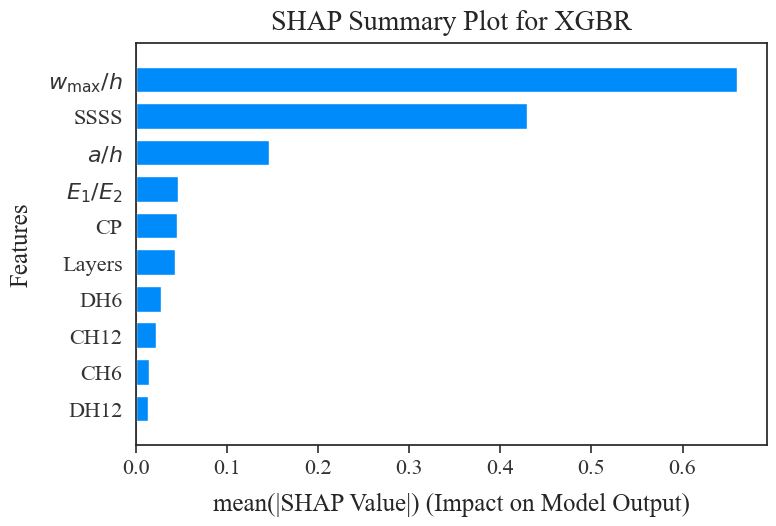

In [42]:
# Create a mapping for the features you want to rename
feature_rename_map = {
    "Modulus_Ratios": r"$E_1 / E_2$",
    "Side_to_Thickness_Ratios": r"$a/h$",
    "Wmax_by_h": r"$w_{\max} / h$",
    # add more mappings here if needed
}


# Apply the mapping to the feature names
updated_feature_names = [
    feature_rename_map.get(feat, feat) for feat in dfnew.columns[:-1]
]

# SHAP summary plot
plt.figure(figsize=(10, 6))
shap.summary_plot(
    shap_values,
    X_test_scaled,
    feature_names=updated_feature_names,
    plot_type='bar',
    show=False
)

# Adjusting the plot aesthetics
plt.xlabel("mean(|SHAP Value|) (Impact on Model Output)", fontsize=18, labelpad=10)
plt.ylabel("Features", fontsize=18, labelpad=10)
plt.title("SHAP Summary Plot for XGBR", fontsize=20, pad=10)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(False)
plt.tight_layout()

# Explicitly ensure borders are visible
for spine in plt.gca().spines.values():
    spine.set_visible(True)


# Save the SHAP summary plot
plt.savefig('plots/SHAP_summary_plot_xgbr.png', dpi=300, bbox_inches='tight')
plt.show()


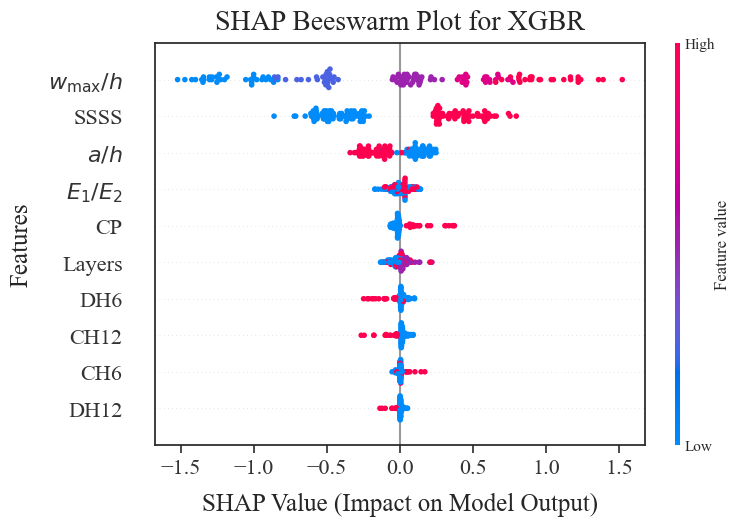

In [43]:
import shap

# Prepare SHAP values
explainer = shap.Explainer(model_xgbr, X_train_scaled)
shap_values = explainer(X_test_scaled)

# Create a mapping for the features you want to rename
rename_map = {
    "Modulus_Ratios": r"$E_1 / E_2$",
    "Side_to_Thickness_Ratios": r"$a/h$",
    "Wmax_by_h": r"$w_{\max} / h$",
    # add more mappings here if needed
}
# Apply mapping (fall back to original name if not in mapping)
feature_names = [rename_map.get(col, col.replace('_', ' ')) for col in dfnew.columns[:-1]]

# Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(
    shap_values.values,
    X_test_scaled,
    feature_names=feature_names,
    show=False
)

# Customize labels and title
plt.xlabel("SHAP Value (Impact on Model Output)", fontsize=18, labelpad=10)
plt.ylabel("Features", fontsize=18, labelpad=10)
plt.title("SHAP Beeswarm Plot for XGBR", fontsize=20, pad=10)

# Increase tick label font size
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Remove grid
plt.grid(False)
plt.tight_layout()

# Explicitly ensure borders are visible
for spine in plt.gca().spines.values():
    spine.set_visible(True)


# Save
plt.savefig('plots/SHAP_beeswarm_plot_xgbr.png', dpi=300, bbox_inches='tight')
plt.show()


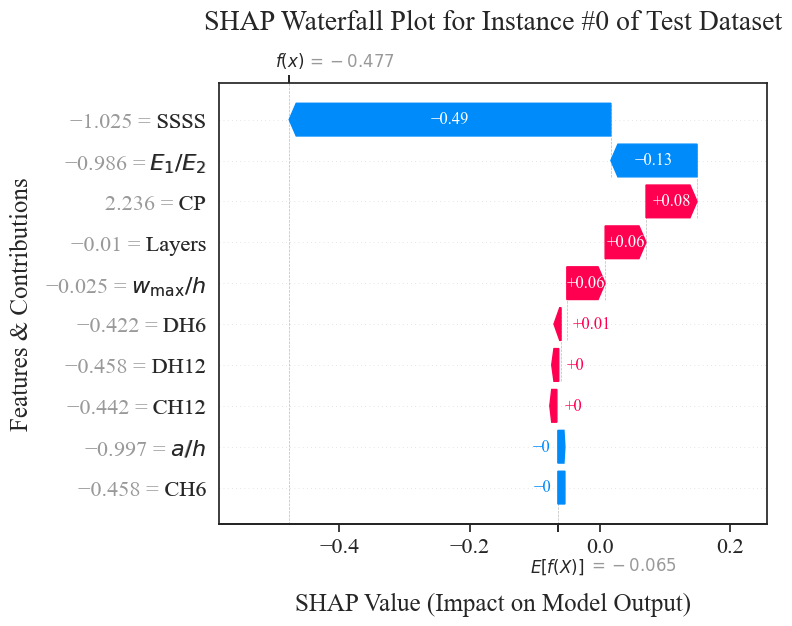

In [44]:
# SHAP waterfall plot

# Create a mapping for the features you want to rename
rename_map = {
    "Modulus_Ratios": r"$E_1 / E_2$",
    "Side_to_Thickness_Ratios": r"$a/h$",
    "Wmax_by_h": r"$w_{\max} / h$",
    # add more mappings here if needed
}

# Apply mapping to feature names (replace underscores for any unmapped feature)
features = [rename_map.get(col, col.replace('_', ' ')) for col in dfnew.columns[:-1]]

# Convert the scaled test data back to a DataFrame for SHAP visualization
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=features)

# Initialize SHAP explainer and create explanation object
explainer_xgbr = shap.Explainer(model_xgbr, X_test_scaled_df, feature_names=features)
explanation = explainer_xgbr(X_test_scaled_df)

# Select the instance to explain
instance_idx = 0  # Change this as needed

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Create SHAP waterfall plot
shap.plots.waterfall(explanation[instance_idx], max_display=20, show=False)

# Adjust plot aesthetics
ax.set_xlabel("SHAP Value (Impact on Model Output)", fontsize=18, labelpad=25)
ax.set_ylabel("Features & Contributions", fontsize=18, labelpad=8)
ax.set_title(f"SHAP Waterfall Plot for Instance #{instance_idx} of Test Dataset",fontsize=20, pad=15)
ax.tick_params(axis='both', labelsize=16)

# Remove all grid lines
ax.grid(False)


# Layout adjustment
plt.tight_layout()

# Explicitly ensure borders are visible
for spine in plt.gca().spines.values():
    spine.set_visible(True)

# Save figure
plt.savefig('plots/SHAP_waterfall_plot_xgbr.png', dpi=300, bbox_inches='tight')

plt.show()


In [45]:
print("Real scaled nonlinear frequency ratio value: ", round(y_test_scaled[instance_idx][0],3))
print("Predicted scaled nonlinear frequency ratio value: ", round(model_xgbr.predict(X_test_scaled)[instance_idx],3))

Real scaled nonlinear frequency ratio value:  -0.45
Predicted scaled nonlinear frequency ratio value:  -0.477


In [46]:
print("Real nonlinear frequency ratio value: ", round(y_test[instance_idx][0],3))
print("Predicted nonlinear frequency ratio value: ", round(y_pred_test_xgbr[instance_idx],3))

Real nonlinear frequency ratio value:  1.149
Predicted nonlinear frequency ratio value:  1.145


In [47]:
X_test[0,:]
#X_test.iloc[0, :]   # Returns first row as Series


array([32. ,  0. , 10. , 10. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0.6])

# LIME Analysis

In [48]:
# Create the lime explainer for the XGBR model
lime_explainer = lime.lime_tabular.LimeTabularExplainer(X_train_scaled, feature_names=dfnew.columns[:-1], class_names=['Nonlienear_natural_frequency_ratio'], mode='regression')

In [49]:
import pandas as pd
import re

# Normalize keys in rename_map for consistent matching
def normalize_feat_name(name):
    return name.lower().replace('_', '')

raw_rename_map = {
    "Modulus_Ratios": r"$E_1 / E_2$",
    "Side_to_Thickness_Ratios": r"$a/h$",
    "Wmax_by_h": r"$w_{\max} / h$",
}

rename_map = {normalize_feat_name(k): v for k, v in raw_rename_map.items()}

exp = lime_explainer.explain_instance(
    X_test_scaled[0],
    model_xgbr.predict,
    num_features=X.shape[1],
    top_labels=1,
    num_samples=1000
)

renamed_explanation = []
for feature_str, weight in exp.as_list(label=0):
    match = re.match(r"([\w]+)", feature_str)
    if match:
        feat_name = match.group(1)
    else:
        feat_name = feature_str.split(' ')[0]
    norm_feat_name = normalize_feat_name(feat_name)
    new_name = rename_map.get(norm_feat_name, feat_name.replace('_', ' '))
    new_feature_str = re.sub(rf"\b{re.escape(feat_name)}\b", new_name, feature_str, count=1)
    renamed_explanation.append((new_feature_str, weight))

# Create a DataFrame to display renamed explanation
df_exp = pd.DataFrame(renamed_explanation, columns=['Feature Description', 'Weight'])
print(df_exp)

# Or in a notebook environment:
from IPython.display import display
display(df_exp)

          Feature Description    Weight
0               SSSS <= -1.02 -0.874217
1              $a/h$ <= -1.00  0.280482
2  -0.73 < Wmax_by_h <= -0.02  0.161833
3               CH12 <= -0.44  0.123879
4                  CP > -0.45  0.084271
5     -1.22 < Layers <= -0.01 -0.080709
6                CH6 <= -0.46  0.063259
7        $E_1 / E_2$ <= -0.99  0.041465
8               DH12 <= -0.46  0.022906
9                DH6 <= -0.42  0.007261


Feature Description    Weight
0               SSSS <= -1.02 -0.874217
1              $a/h$ <= -1.00  0.280482
2  -0.73 < Wmax_by_h <= -0.02  0.161833
3               CH12 <= -0.44  0.123879
4                  CP > -0.45  0.084271
5     -1.22 < Layers <= -0.01 -0.080709
6                CH6 <= -0.46  0.063259
7        $E_1 / E_2$ <= -0.99  0.041465
8               DH12 <= -0.46  0.022906
9                DH6 <= -0.42  0.007261

In [50]:
import re
import pandas as pd

# Normalize keys
def normalize_feat_name(name):
    return name.lower().replace('_', '')

raw_rename_map = {
    "Modulus_Ratios": r"$E_1 / E_2$",
    "Side_to_Thickness_Ratios": r"$a/h$",
    "Wmax_by_h": r"$w_{\max} / h$",
}

rename_map = {normalize_feat_name(k): v for k, v in raw_rename_map.items()}

# Prepare renamed feature names list for explainer
original_features = dfnew.columns[:-1].tolist()

renamed_features = []
for f in original_features:
    norm_f = normalize_feat_name(f)
    renamed_features.append(rename_map.get(norm_f, f.replace('_', ' ')))

# Create Lime explainer with renamed feature names
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=renamed_features,
    mode='regression'
)

# Now explain instance as usual (feature names will be used internally)
exp = lime_explainer.explain_instance(
    X_test_scaled[0],
    model_xgbr.predict,
    num_features=len(renamed_features),
    num_samples=1000
)

# Display explanation in notebook with renamed features
exp.show_in_notebook(show_table=True)


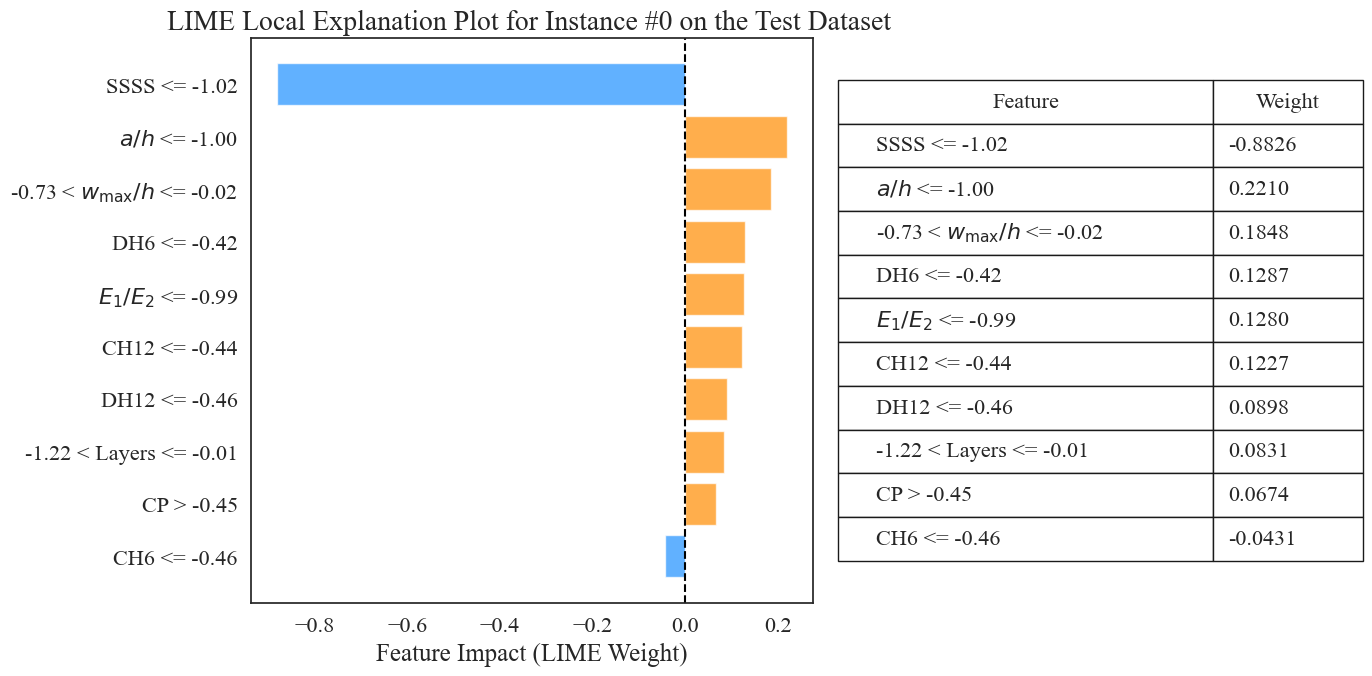

In [51]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["font.family"] = "Times New Roman"

# Get explanation data
explanation = exp.as_list()

features = [f for f, w in explanation]
weights = [w for f, w in explanation]

fig, (ax_bar, ax_table) = plt.subplots(
    1, 2, figsize=(14, 7), gridspec_kw={'width_ratios': [3, 2]}
)

# --- Bar plot ---
y_pos = np.arange(len(features))
colors = ['#FF8C00' if w > 0 else '#1E90FF' for w in weights]

ax_bar.barh(y_pos, weights, color=colors, alpha=0.7)
ax_bar.set_yticks(y_pos)
ax_bar.set_yticklabels(features, fontsize=16)
ax_bar.tick_params(axis='x', labelsize=16)
ax_bar.invert_yaxis()
ax_bar.axvline(x=0, color='black', linestyle='--')
ax_bar.set_xlabel('Feature Impact (LIME Weight)', fontsize=18)
ax_bar.set_title('LIME Local Explanation Plot for Instance #0 on the Test Dataset ', fontsize=20)
ax_bar.grid(visible=False)
 
# --- Table subplot ---
ax_table.axis('off')  # Hide axes for table
ax_table.grid(visible=False)
# Format table data
table_data = [[feat, f"{weight:.4f}"] for feat, weight in explanation]

# Add table to right subplot
table = ax_table.table(
    cellText=table_data,
    colLabels=['Feature', 'Weight'],
    cellLoc='left',
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(16)
table.scale(1.5, 2.5)  # Adjust row height
# Manually adjust column widths (wider or narrower)
for key, cell in table.get_celld().items():
    # key is (row, col) tuple; col=0 is first column
    col = key[1]
    if col == 0:
        cell.set_width(1)  # width for first column (adjust value as needed)
    else:
        cell.set_width(0.4)  # width for other columns

plt.tight_layout()

# Save combined figure
fig.savefig("plots/lime_explanation_side_by_side.png", dpi=300, bbox_inches='tight')

plt.show()


In [52]:
# Save the LIME explanation to an HTML file
exp.save_to_file('plots/lime_explanation_0.html')

In [54]:
# SAVE LIME EXPLANATION AS IMAGE
# Point to your local HTML file
html_path = os.path.abspath("plots/lime_explanation_0.html")
file_url  = "file://" + html_path

# Configure headless Chrome
options = Options()
options.add_argument("--headless")
options.add_argument("--window-size=1200,800")              # height must exceed full table

# Use Service() to pass the driver path
service = Service(ChromeDriverManager().install())
driver  = webdriver.Chrome(service=service, options=options)

# Load the page
driver.get(file_url)

# Locate the DIV (or whatever wrapper) that’s scrolling
# Inspect your HTML to find the right selector. Often LIME uses a div.table_div
scrollable_div = driver.find_element(By.CSS_SELECTOR, "div.table_div")

# 4) Expand it to show all rows
driver.execute_script("""const div = arguments[0];
                      div.style.height = div.scrollHeight + 'px';
                      div.style.overflow = 'visible';""", scrollable_div)

# Locate the table element and screenshot it
table = driver.find_element(By.TAG_NAME, "table")
table.screenshot("plots/lime_explanation_table.png")

# Capture the full viewport too
driver.save_screenshot("plots/lime_explanation_full.png")

driver.quit()

### Aggregate LIME Weights

In [55]:
def return_weights(exp):
    """
    Function to get weights from LIME explanation object.
    Args:
        exp: LIME explanation object
    """
    exp_list = exp.as_map()[1]
    exp_list = sorted(exp_list, key=lambda x: x[0])
    exp_weight = [x[1] for x in exp_list]

    return exp_weight

In [56]:
weights = []

# Iterate through the test set and get weights for each instance
for i in range(len(X_test_scaled)):

    # Get the explanation for the i-th instance
    exp = lime_explainer.explain_instance(X_test_scaled[i], model_xgbr.predict, labels=dfnew.columns[:-1], num_features=X.shape[1])

    # Get the weights for the i-th instance
    weights.append(return_weights(exp))

# Convert weights to a DataFrame for easier manipulation
weights_df = pd.DataFrame(weights, columns=dfnew.columns[:-1])

In [57]:
weights_df.head()

Layers      SSSS  Modulus_Ratios  Side_to_Thickness_Ratios      CH12  \
0  0.011423 -0.761135       -0.004577                  0.202033  0.120046   
1 -0.019354 -0.784168        0.017170                  0.205623  0.100718   
2  0.063842 -0.825637        0.041451                 -0.200930  0.070347   
3  0.025006 -0.772594        0.052559                 -0.209014  0.090792   
4  0.052268 -0.835886       -0.050651                 -0.196891 -0.097029   

        CH6        CP      DH12       DH6  Wmax_by_h  
0 -0.041284  0.069214  0.045080  0.104445   0.224017  
1 -0.038200 -0.135853 -0.067376  0.081866   0.228907  
2 -0.023874 -0.160660  0.045035 -0.066961  -1.698228  
3 -0.027644 -0.101148  0.016948 -0.058677  -1.695465  
4 -0.024315 -0.155402  0.049070  0.078231   0.866642

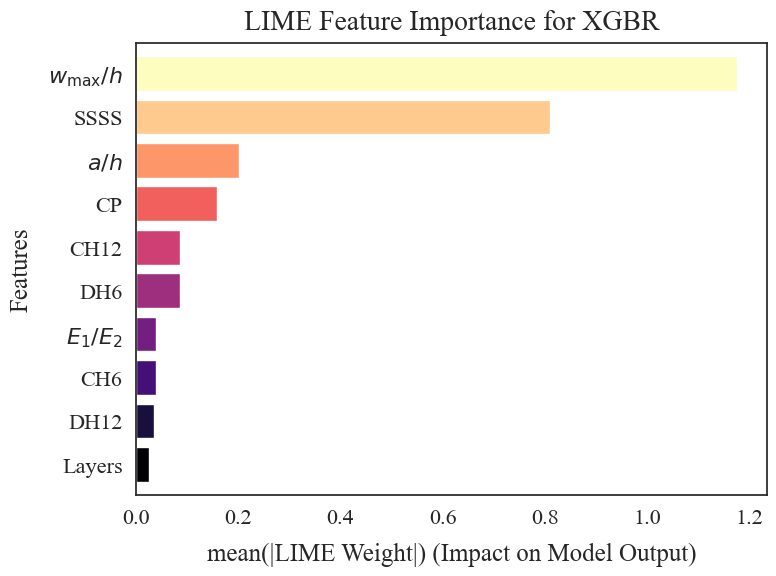

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm

# Example rename map
rename_map = {
    "Modulus_Ratios": r"$E_1 / E_2$",
    "Side_to_Thickness_Ratios": r"$a/h$",
    "Wmax_by_h": r"$w_{\max} / h$",
    # Add more mappings if needed
}

# Get mean absolute weights for each feature
abs_mean_weights = weights_df.abs().mean()
abs_mean_weights = pd.DataFrame(data={'Feature': abs_mean_weights.index, 'Abs_Mean': abs_mean_weights})

# Rename features using the mapping
abs_mean_weights['Feature'] = abs_mean_weights['Feature'].replace(rename_map)

# Sort values
abs_mean_weights = abs_mean_weights.sort_values('Abs_Mean')

# Prepare colormap (magma)
colors = cm.magma(np.linspace(0, 1, len(abs_mean_weights)))

# Plotting mean absolute weights
y_ticks = range(len(abs_mean_weights))
y_labels = abs_mean_weights['Feature']

#fig, ax = plt.subplots(figsize=(10, len(y_labels) * 0.45 + 1))
plt.figure(figsize=(8, 6))
plt.grid(False)
plt.barh(y_ticks, abs_mean_weights['Abs_Mean'], color=colors)
plt.yticks(y_ticks, y_labels, fontsize=16)
plt.ylim(-0.7, len(y_labels) - 0.3)
plt.xticks(fontsize=16)
plt.ylabel('Features', fontsize=18, labelpad=10)
plt.xlabel('mean(|LIME Weight|) (Impact on Model Output)', fontsize=18, labelpad=10)
plt.title('LIME Feature Importance for XGBR', fontsize=20, pad=10)
plt.tight_layout()

# Save the LIME summary plot
plt.savefig('plots/LIME_summary_plot_xgbr.png', dpi=300, bbox_inches='tight')

plt.show()


In [59]:
abs_mean_weights

Feature  Abs_Mean
Layers                            Layers  0.026024
DH12                                DH12  0.034526
CH6                                  CH6  0.038393
Modulus_Ratios               $E_1 / E_2$  0.039928
DH6                                  DH6  0.085274
CH12                                CH12  0.086771
CP                                    CP  0.158229
Side_to_Thickness_Ratios           $a/h$  0.201211
SSSS                                SSSS  0.808932
Wmax_by_h                 $w_{\max} / h$  1.174523

In [60]:
pd.DataFrame(X_test_scaled, columns=dfnew.columns[:-1])

Layers      SSSS  Modulus_Ratios  Side_to_Thickness_Ratios      CH12  \
0   -0.010483 -1.024608       -0.986206                 -0.996534 -0.441612   
1   -1.218120 -1.024608       -0.986206                 -0.996534 -0.441612   
2   -0.010483 -1.024608       -0.986206                  1.003478 -0.441612   
3   -0.010483 -1.024608       -0.986206                  1.003478 -0.441612   
4   -1.218120 -1.024608        1.013987                  1.003478  2.264434   
..        ...       ...             ...                       ...       ...   
139 -1.218120 -1.024608        1.013987                  1.003478 -0.441612   
140 -1.218120 -1.024608        1.013987                  1.003478  2.264434   
141 -0.010483 -1.024608       -0.986206                  1.003478 -0.441612   
142  1.197154  0.975983        1.013987                 -0.996534 -0.441612   
143 -0.010483 -1.024608        1.013987                  1.003478  2.264434   

          CH6        CP      DH12       DH6  Wmax_by_h  
0   -0.458349  2.236068 -0.458349 -0.421799   -0.02456  
1   -0.458349 -0.447214  2.181742 -0.421799   -0.02456  
2   -0.458349 -0.447214 -0.458349  2.370799   -1.43920  
3   -0.458349 -0.447214 -0.458349  2.370799   -0.73188  
4   -0.458349 -0.447214 -0.458349 -0.421799    0.68276  
..        ...       ...       ...       ...        ...  
139 -0.458349 -0.447214  2.181742 -0.421799   -0.73188  
140 -0.458349 -0.447214 -0.458349 -0.421799   -0.73188  
141  2.181742 -0.447214 -0.458349 -0.421799   -0.73188  
142 -0.458349 -0.447214 -0.458349  2.370799   -1.43920  
143 -0.458349 -0.447214 -0.458349 -0.421799    0.68276  

[144 rows x 10 columns]

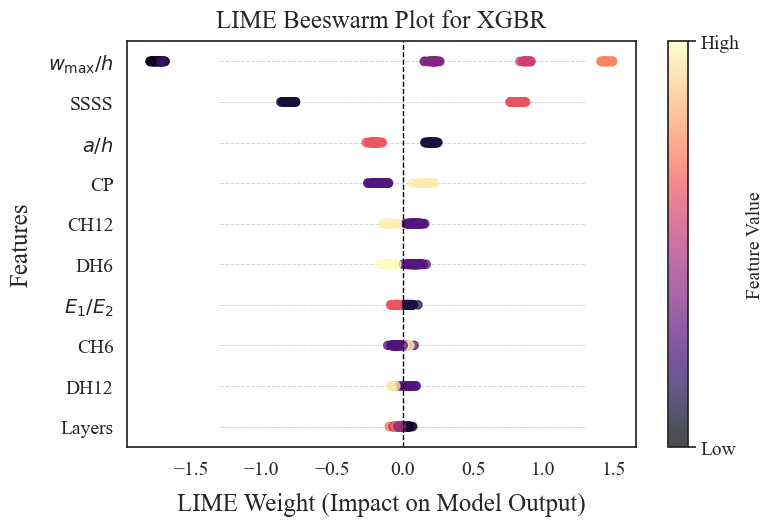

In [61]:
# --- Your rename map ---
rename_map = {
    "Modulus_Ratios": r"$E_1 / E_2$",
    "Side_to_Thickness_Ratios": r"$a/h$",
    "Wmax_by_h": r"$w_{\max} / h$",
}

def normalize_feat_name(name):
    return name.lower().replace('_', '').replace(' ', '')

# Normalized rename map for matching
normalized_rename_map = {normalize_feat_name(k): v for k, v in rename_map.items()}

def rename_feature(feat):
    norm_feat = normalize_feat_name(feat)
    return normalized_rename_map.get(norm_feat, feat.replace('_', ' '))

# ✅ Get ORIGINAL feature names
y_labels_original = weights_df.columns.tolist()

# --- Sort features by mean absolute LIME weight ---
mean_abs_weights = weights_df.abs().mean(axis=0)
sorted_features = mean_abs_weights.sort_values(ascending=True).index.tolist()

# Apply sorting
y_labels_original = sorted_features
y_labels_display = [rename_feature(f) for f in y_labels_original]

# --- Data setup ---
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=dfnew.columns[:-1])

fig, ax = plt.subplots(figsize=(8, len(y_labels_display)*0.45 + 1))
y_ticks = list(range(len(y_labels_display)))

# Horizontal grid lines
for y in y_ticks:
    ax.hlines(y, xmin=-1.3, xmax=1.3, color='lightgrey', linestyle='--', linewidth=0.7, zorder=0)

# Global min/max for color scale
all_values = X_test_scaled_df[y_labels_original].values
vmin, vmax = all_values.min(), all_values.max()

# Scatter points (beeswarm)
for i, feature in enumerate(y_labels_original):
    feature_weight = weights_df[feature].values
    feature_value = X_test_scaled_df[feature].values

    sc = ax.scatter(feature_weight, [i]*len(feature_weight),
                    c=feature_value, cmap='magma', alpha=0.7,
                    vmin=vmin, vmax=vmax, zorder=1)

# Vertical line at 0
ax.vlines(0, ymin=-0.5, ymax=len(y_labels_display)-0.5, color='black', linestyle='--', linewidth=1)

# Colorbar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Feature Value', fontsize=14)
cbar.set_ticks([vmin, vmax])
cbar.set_ticklabels(['Low', 'High'])
cbar.ax.tick_params(labelsize=14)

# Axis labels & titles
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels_display, fontsize=14)
ax.set_ylim(-0.5, len(y_labels_display)-0.5)
ax.tick_params(axis='x', labelsize=14)
ax.set_ylabel('Features', fontsize=18, labelpad=10)
ax.set_xlabel('LIME Weight (Impact on Model Output)', fontsize=18, labelpad=10)
ax.set_title('LIME Beeswarm Plot for XGBR', fontsize=18, pad=10)
ax.grid(False)

plt.tight_layout()
plt.savefig('plots/LIME_beeswarm_plot_xgbr.png', dpi=300, bbox_inches='tight')
plt.show()


## Grouped SHAP Analysis

In [62]:
dfnew

Layers  SSSS  Modulus_Ratios  Side_to_Thickness_Ratios  CH12  CH6  CP  \
0        16     0              10                        10     0    0   0   
1        16     0              10                        10     0    1   0   
2        16     0              10                        10     0    0   0   
3        16     0              10                        10     1    0   0   
4        16     0              10                        10     0    0   1   
..      ...   ...             ...                       ...   ...  ...  ..   
715      48     1              40                       100     0    1   0   
716      48     1              40                       100     0    0   0   
717      48     1              40                       100     1    0   0   
718      48     1              40                       100     0    0   1   
719      48     1              40                       100     0    0   0   

     DH12  DH6  Wmax_by_h  Nonlinear_Frequency_Ratio  
0       0    1        0.2                     1.0174  
1       0    0        0.2                     1.0172  
2       1    0        0.2                     1.0191  
3       0    0        0.2                     1.0179  
4       0    0        0.2                     1.0176  
..    ...  ...        ...                        ...  
715     0    0        1.0                     1.6077  
716     1    0        1.0                     1.5843  
717     0    0        1.0                     1.5810  
718     0    0        1.0                     1.7898  
719     0    0        1.0                     1.5709  

[720 rows x 11 columns]

In [63]:
# --- 2. Define Feature Groups ---
# Define which features belong to which group. This is the key step for grouped analysis.
feature_groups = {
    'Geometry Conditions': ['Layers','Side_to_Thickness_Ratios','CH12','CH6','CP','DH12','DH6','Wmax_by_h'],
    'Boundary Conditions': ['SSSS'],
    'Material Properties': ['Modulus_Ratios']
}
print("\nDefined Feature Groups:")
for group, features in feature_groups.items():
    print(f"- {group}: {features}")



Defined Feature Groups:
- Geometry Conditions: ['Layers', 'Side_to_Thickness_Ratios', 'CH12', 'CH6', 'CP', 'DH12', 'DH6', 'Wmax_by_h']
- Boundary Conditions: ['SSSS']
- Material Properties: ['Modulus_Ratios']


In [64]:
# --- 3. Train a Machine Learning Model ---
X = dfnew.drop('Nonlinear_Frequency_Ratio', axis=1)
y = dfnew['Nonlinear_Frequency_Ratio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining a XGBRRegressor model...")
model = XGBRegressor()
model.fit(X_train, y_train)
print("Model training complete.")


Training a XGBRRegressor model...
Model training complete.


In [65]:
# --- 4. Calculate Standard SHAP Values ---
# First, we calculate the SHAP values for all individual features as usual.
print("\nCalculating SHAP values for individual features...")
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# For clarity, let's put the SHAP values into a DataFrame with corresponding feature names
shap_df = pd.DataFrame(shap_values, columns=X_test.columns)
print("SHAP values calculated.")


Calculating SHAP values for individual features...
SHAP values calculated.


In [66]:
shap_df

Layers      SSSS  Modulus_Ratios  Side_to_Thickness_Ratios      CH12  \
0    0.013990 -0.089884       -0.020090                  0.009697  0.000949   
1   -0.007701 -0.084603       -0.015937                  0.029714  0.000790   
2    0.015017 -0.035974        0.007628                 -0.007979  0.000901   
3    0.024015 -0.046334        0.007423                 -0.010728  0.000631   
4   -0.014741 -0.086905       -0.010324                 -0.038359 -0.014333   
..        ...       ...             ...                       ...       ...   
139 -0.004448 -0.061762        0.002249                 -0.040793  0.000595   
140 -0.005748 -0.062269        0.002643                 -0.039964 -0.002320   
141  0.024052 -0.050114        0.008527                 -0.007654  0.000793   
142  0.002695  0.041838        0.005512                  0.018659  0.000880   
143  0.010344 -0.078481       -0.020499                 -0.035158 -0.007805   

          CH6        CP      DH12       DH6  Wmax_by_h  
0    0.000345  0.021324  0.001067  0.000504   0.009993  
1   -0.001534 -0.002634 -0.005108  0.000441   0.000863  
2   -0.000925 -0.001882  0.000179 -0.002764  -0.156376  
3   -0.000647 -0.002927 -0.000369 -0.002471  -0.082747  
4   -0.002652 -0.003293  0.001322  0.004383   0.064728  
..        ...       ...       ...       ...        ...  
139 -0.001375 -0.002415 -0.000907  0.001299  -0.077990  
140 -0.001410 -0.002437  0.000345  0.001022  -0.074150  
141  0.002010 -0.002937 -0.000257  0.000478  -0.087273  
142 -0.000734 -0.002929  0.000325 -0.003176  -0.220339  
143 -0.000588 -0.002841  0.001362  0.002114   0.072694  

[144 rows x 10 columns]

In [67]:
# --- 5. Aggregate SHAP Values by Group ---
# Now, sum the SHAP values for the features within each defined group.
# It's crucial to sum the raw SHAP values, not their absolute values,
# to preserve the direction of the impact.
print("\nAggregating SHAP values by group...")
grouped_shap_values = pd.DataFrame()
for group_name, feature_list in feature_groups.items():
    grouped_shap_values[group_name] = shap_df[feature_list].sum(axis=1)

print("Aggregation complete.")
print("Shape of grouped SHAP values:", grouped_shap_values.shape)


Aggregating SHAP values by group...
Aggregation complete.
Shape of grouped SHAP values: (144, 3)


In [68]:
grouped_shap_values

Geometry Conditions  Boundary Conditions  Material Properties
0               0.057869            -0.089884            -0.020090
1               0.014832            -0.084603            -0.015937
2              -0.153829            -0.035974             0.007628
3              -0.075245            -0.046334             0.007423
4              -0.002945            -0.086905            -0.010324
..                   ...                  ...                  ...
139            -0.126035            -0.061762             0.002249
140            -0.124662            -0.062269             0.002643
141            -0.070789            -0.050114             0.008527
142            -0.204618             0.041838             0.005512
143             0.040122            -0.078481            -0.020499

[144 rows x 3 columns]


Generating grouped SHAP summary plot (bar)...


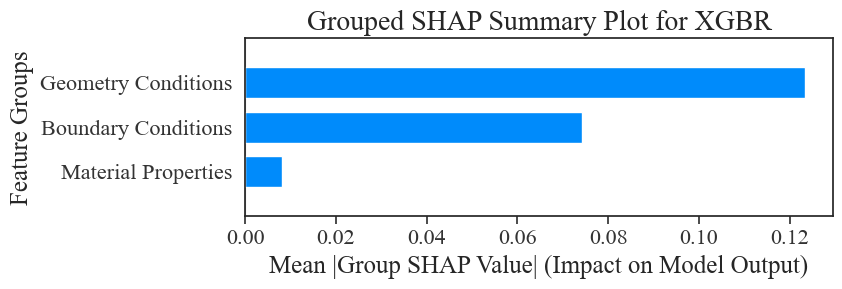

Bar plot created. This shows the mean absolute SHAP value for each group.


In [69]:
# --- 6. Visualize Grouped SHAP Analysis ---
# We can now use the standard SHAP plots, but with our aggregated values.
# The `summary_plot` (or `beeswarm`) will show the importance and impact of each *group*.

print("\nGenerating grouped SHAP summary plot (bar)...")

shap.summary_plot(
    grouped_shap_values.values,
    feature_names=grouped_shap_values.columns,
    plot_type="bar",
    show=False
)
# Explicitly ensure borders are visible
for spine in plt.gca().spines.values():
    spine.set_visible(True)

plt.title("Grouped SHAP Summary Plot for XGBR", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Mean |Group SHAP Value| (Impact on Model Output)", fontsize=18)
plt.ylabel("Feature Groups", fontsize=18)
plt.grid(False)
plt.savefig('plots/Grouped_SHAP_summary_plot_xgbr.png', dpi=300, bbox_inches='tight')
plt.show()

print("Bar plot created. This shows the mean absolute SHAP value for each group.")



Generating grouped SHAP beeswarm plot...


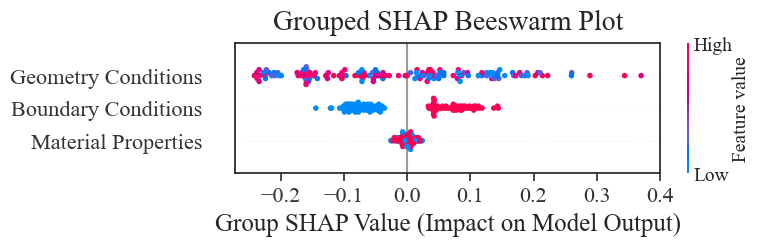

Beeswarm plot saved as 'Grouped_SHAP_beeswarm_plot_xgbr.png'.


In [70]:
# Create grouped X_test by averaging feature values in each group
grouped_X_test = pd.DataFrame()
for group_name, feature_list in feature_groups.items():
    grouped_X_test[group_name] = X_test[feature_list].mean(axis=1)

# Create directory if it doesn't exist
os.makedirs("plots", exist_ok=True)

# Generate grouped SHAP beeswarm plot
print("\nGenerating grouped SHAP beeswarm plot...")

# Set figure size before shap plot
plt.figure(figsize=(10, 6))

shap.summary_plot(
    grouped_shap_values.values,
    grouped_X_test,
    feature_names=grouped_shap_values.columns,
    show=False  # Do not show immediately; allows saving
)
plt.title("Grouped SHAP Beeswarm Plot", fontsize=20, pad=10)
plt.xlabel("Group SHAP Value (Impact on Model Output)",fontsize=18) 
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(False)
plt.tight_layout()

# Explicitly ensure borders are visible
for spine in plt.gca().spines.values():
    spine.set_visible(True)

# Get existing colorbar axis and set font size for ticks and label
fig = plt.gcf()
cbar = fig.axes[-1]  # colorbar is usually the last axes

cbar.tick_params(labelsize=14)
if cbar.yaxis.label:
    cbar.yaxis.label.set_size(14)


plt.savefig("plots/Grouped_SHAP_beeswarm_plot_xgbr.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("Beeswarm plot saved as 'Grouped_SHAP_beeswarm_plot_xgbr.png'.")



Generating SHAP waterfall plot for instance #0...


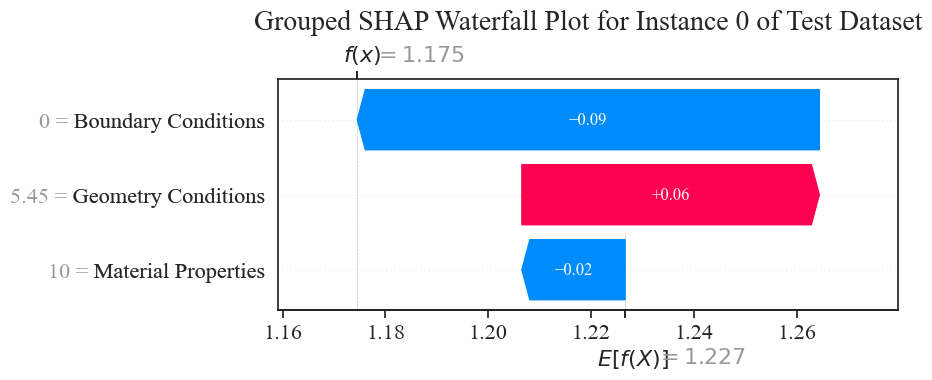

Saved waterfall plot: 'Grouped_SHAP_waterfall_plot_instance_0.png'


In [71]:

os.makedirs("plots", exist_ok=True)

instance_idx = 0

if hasattr(grouped_shap_values, "base_values"):
    base_value = grouped_shap_values.base_values[instance_idx]
else:
    base_value = y_train.mean()

grouped_explanation = shap.Explanation(
    values=grouped_shap_values.values[instance_idx],
    base_values=base_value,
    data=grouped_X_test.iloc[instance_idx].values,
    feature_names=grouped_shap_values.columns
)

print(f"\nGenerating SHAP waterfall plot for instance #{instance_idx}...")

plt.title("Grouped SHAP Waterfall Plot for Instance 0 of Test Dataset", fontsize=20, pad=10)
# Disable grid globally before plotting
plt.rcParams['axes.grid'] = False

# Plot without showing immediately
shap.plots.waterfall(grouped_explanation, max_display=15, show=False)

fig = plt.gcf()

# Hide grid on all axes
for ax in fig.axes:
    ax.grid(False)
    # Set font size for title, labels, ticks
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(18)
    ax.yaxis.label.set_fontsize(18)
    ax.tick_params(axis='both', labelsize=16)

# Explicitly ensure borders are visible
for spine in plt.gca().spines.values():
    spine.set_visible(True)
# Save and show
fig.savefig(f"plots/Grouped_SHAP_waterfall_plot_instance_{instance_idx}.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close(fig)


print(f"Saved waterfall plot: 'Grouped_SHAP_waterfall_plot_instance_{instance_idx}.png'")

# Reset grid setting
plt.rcParams['axes.grid'] = True


## Grouped LIME Analysis

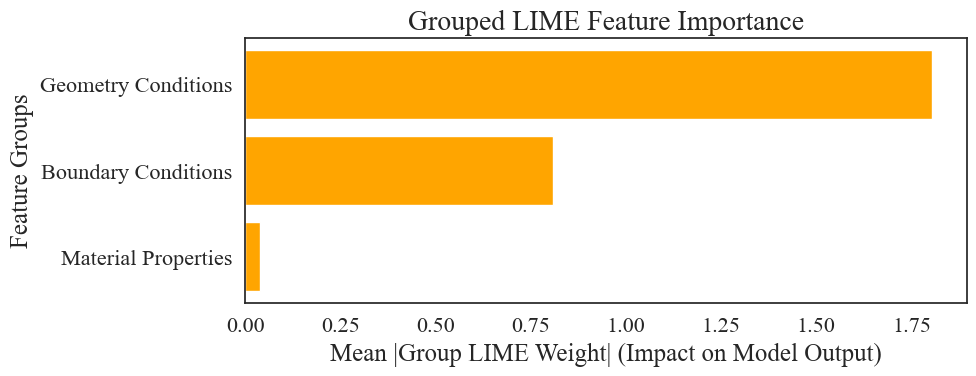

In [72]:


# Example: weights_df is DataFrame with LIME feature weights per instance (rows) and features (columns)
# weights_df.shape = (num_test_instances, num_features)

# Calculate absolute mean weights for each feature across instances
abs_mean_weights = weights_df.abs().mean()

# Initialize a DataFrame for grouped weights
grouped_weights = {}

# Aggregate feature weights per group by summing mean absolute weights of each feature in that group
for group_name, features in feature_groups.items():
    # Make sure to handle features missing in weights_df columns
    valid_features = [f for f in features if f in abs_mean_weights.index]
    grouped_weights[group_name] = abs_mean_weights.loc[valid_features].sum()

# Convert grouped weights to DataFrame for plotting
grouped_weights_df = pd.DataFrame({
    'Group': list(grouped_weights.keys()),
    'Abs_Mean_Weight': list(grouped_weights.values())
})

# Sort groups by importance
grouped_weights_df = grouped_weights_df.sort_values(by='Abs_Mean_Weight')

# Plotting grouped LIME feature importance (horizontal bar plot)
plt.figure(figsize=(10, 4))
plt.barh(grouped_weights_df['Group'], grouped_weights_df['Abs_Mean_Weight'], color='orange')
plt.xlabel('Mean |Group LIME Weight| (Impact on Model Output)', fontsize=18)
plt.ylabel('Feature Groups', fontsize=18)
plt.title('Grouped LIME Feature Importance', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(False)
plt.tight_layout()
fig.savefig(f"plots/Grouped_Lime_feature_importance_plot_.png", dpi=300, bbox_inches='tight')
plt.show()


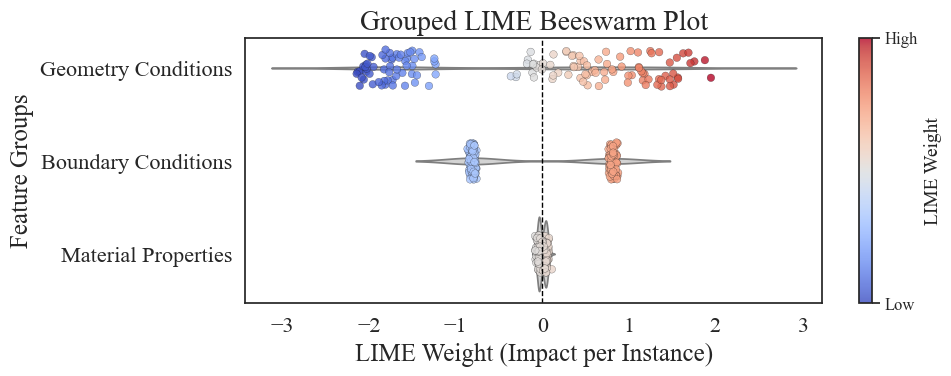

In [73]:
# Step 1: Aggregate LIME weights per group per instance (row-wise sum)
grouped_instance_weights = pd.DataFrame(index=weights_df.index)

for group_name, features in feature_groups.items():
    valid_features = [f for f in features if f in weights_df.columns]
    grouped_instance_weights[group_name] = weights_df[valid_features].sum(axis=1)

# Step 2: Melt for plotting (long format)
melted_weights = grouped_instance_weights.reset_index().melt(
    id_vars='index',
    var_name='Group',
    value_name='Weight'
)

# Step 3: Map groups to numeric positions (for scatter y-axis)
group_order = melted_weights['Group'].unique()
group_to_y = {group: i for i, group in enumerate(group_order)}
melted_weights['y_pos'] = melted_weights['Group'].map(group_to_y)

# Step 4: Plot
plt.figure(figsize=(10, 4))

# Violin background
sns.violinplot(
    data=melted_weights,
    x="Weight",
    y="Group",
    inner=None,
    orient="h",
    color="lightgray"
)

# Beeswarm-like scatter with colormap
sc = plt.scatter(
    melted_weights["Weight"],
    melted_weights["y_pos"] + np.random.uniform(-0.2, 0.2, size=len(melted_weights)),  # jitter
    c=melted_weights["Weight"],
    cmap="coolwarm",
    s=30,
    alpha=0.8,
    edgecolor="k",
    linewidth=0.2
)

# Colorbar
cbar = plt.colorbar(sc)
cbar.set_label("LIME Weight", fontsize=14)
cbar.set_ticks([melted_weights["Weight"].min(), melted_weights["Weight"].max()])
cbar.set_ticklabels(["Low", "High"])
cbar.ax.tick_params(labelsize=12)

# Reference line
plt.axvline(0, color='black', linestyle='--', linewidth=1)

# Labels & formatting
plt.yticks(range(len(group_order)), group_order, fontsize=16)
plt.xlabel("LIME Weight (Impact per Instance)", fontsize=18)
plt.ylabel("Feature Groups", fontsize=18)
plt.title("Grouped LIME Beeswarm Plot", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(False)
plt.tight_layout()

plt.savefig("plots/Grouped_LIME_Beeswarm_with_Colorbar.png", dpi=300, bbox_inches="tight")
plt.show()


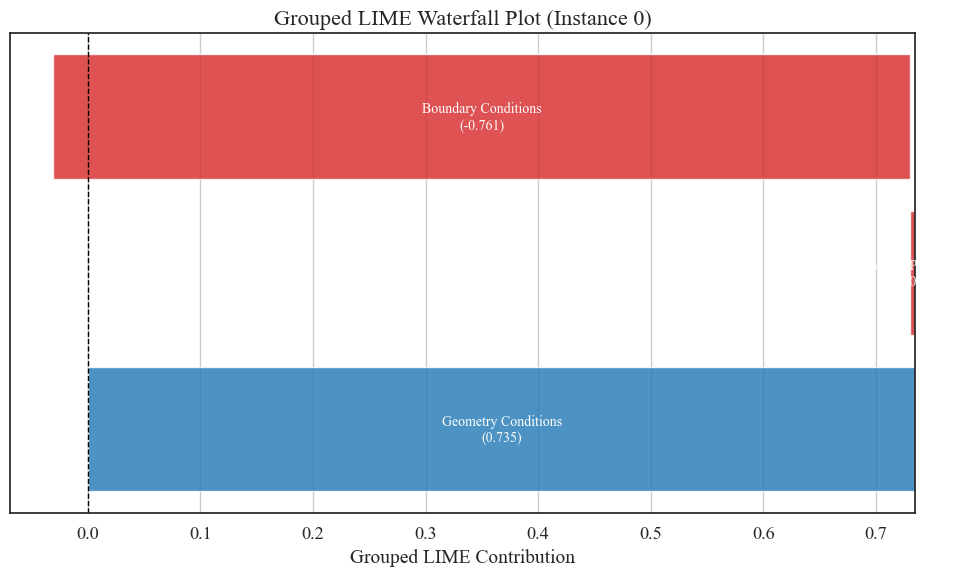

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Pick instance 0 (can change to any index)
instance_id = 0
instance_weights = grouped_instance_weights.loc[instance_id].sort_values(ascending=False)

# Waterfall cumulative sums
sorted_groups = instance_weights.index
values = instance_weights.values
cumulative = np.cumsum(np.insert(values, 0, 0))  # insert 0 at start

# Plot
plt.figure(figsize=(10, 6))

# Bars
for i, (group, val) in enumerate(zip(sorted_groups, values)):
    color = "tab:red" if val < 0 else "tab:blue"
    plt.barh(i, val, left=cumulative[i], color=color, alpha=0.8)
    plt.text(cumulative[i] + val/2, i, f"{group}\n({val:.3f})",
             ha="center", va="center", fontsize=10, color="white")

# Formatting
plt.axvline(0, color="black", linestyle="--", linewidth=1)
plt.yticks([])
plt.xlabel("Grouped LIME Contribution", fontsize=14)
plt.title(f"Grouped LIME Waterfall Plot (Instance {instance_id})", fontsize=16)
plt.tight_layout()

plt.savefig(f"plots/Grouped_LIME_Waterfall_Instance_{instance_id}.png", dpi=300, bbox_inches="tight")
plt.show()
